In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from so.plotting import plot_data_dist_grid, plot_col_dist, plot_network_graph
from so.utils import get_na_summary, get_col_unique_val, one_hot_encode

from IPython.display import display, Markdown, Latex

In [2]:
raw_data = pd.read_csv(r'.\so-survey-2017\survey_results_public.csv')
meta_data = pd.read_csv(r'.\so-survey-2017\survey_meta.csv')

In [3]:
raw_data.shape

(51392, 154)

In [4]:
raw_data.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get the unique values per col.

In [5]:
uq_vals = get_col_unique_val(raw_data)
# Since this is just a index
uq_vals.pop('Respondent') 
uq_vals.pop('Salary') 
uq_vals.pop('ExpectedSalary') 

uq_vals_df = {key: ['|'.join(val), len(val)] for key, val in uq_vals.items()}
uq_vals_df = pd.DataFrame.from_dict(uq_vals_df, orient='index')
uq_vals_df.reset_index(inplace=True)
uq_vals_df.columns = ['column', 'unique_values', 'count']
uq_vals_df.sort_values(['count'], ascending=False, inplace=True)
# uq_vals_df.to_csv(r'.\so-survey-2017\survey_results_uq.csv', index=False)

In [6]:
# {
#     'No': 0,
#     'Yes, I program as a hobby': 1,
#     'Yes, both': 3,
#     'Yes, I contribute to open source projects': 2
# }

# {
#     'Yes, part-time': 1,
#     'Yes, full-time': 2,
#     'No': 0,
#     'I prefer not to say': -1
# }

# {   
#     # nan,
#     'Strongly disagree': -2,
#     'Disagree': -1,
#     'Agree': 0,
#     'Somewhat agree': 1,
#     'Strongly agree': 2
# }

# {
#     # nan,
#     'Not at all important': -2,   
#     'Not very important': -1,
#     'Important': 0,
#     'Somewhat important': 1,
#     'Very important': 2
# }

# {
#     # nan,
#     'Not at all satisfied': -2,
#     'Not very satisfied': -1,
#     'Satisfied': 0,
#     'Somewhat satisfied': 1,
#     'Very satisfied': 2
#  }

# {
#     # nan,
#     'No influence at all': -2,
#     'Not much influence': -1, 
#     'Some influence': 0,
#     'A lot of influence': 1,
#     'I am the final decision maker': 2
# }

# {
#     # nan
#     'Haven\'t done at all': -2,
#     'Once or twice': -1,
#     'Several times': 0,
#     'At least once each week': 1,
#     'At least once each day': 2
#     }


### Missing Data

In [7]:
na_by_col = get_na_summary(raw_data, 0)
na_by_row = get_na_summary(raw_data, 1)

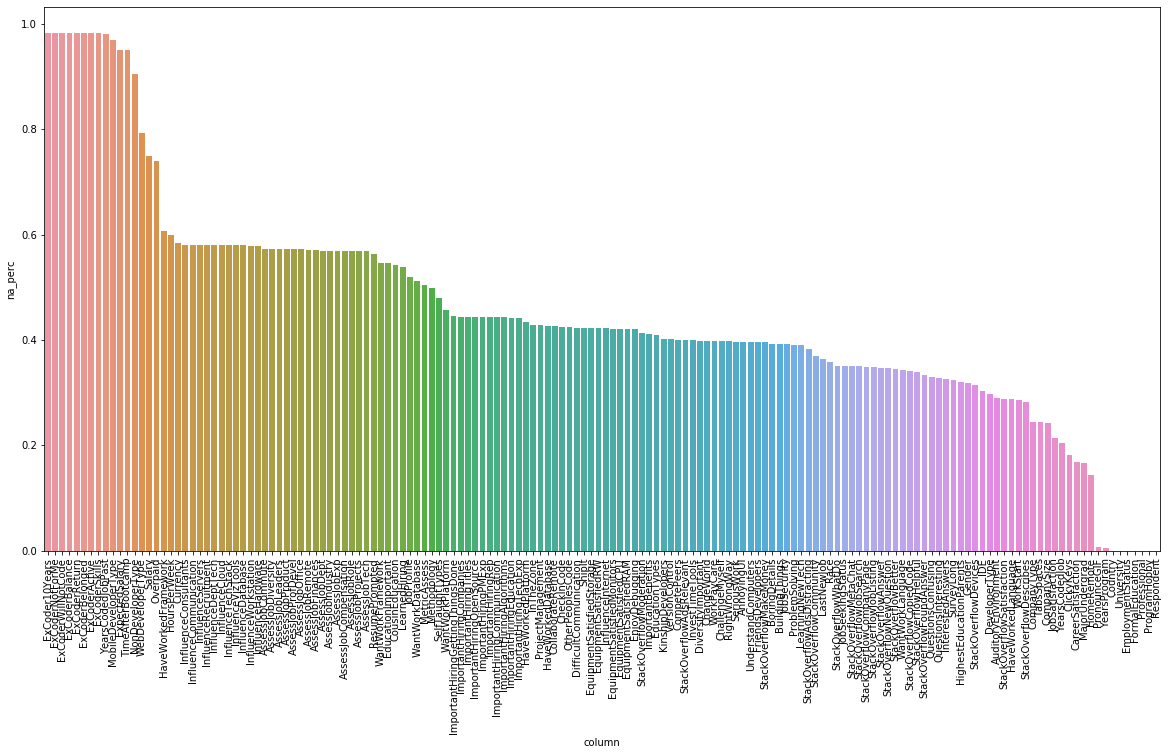

In [8]:

na_by_col.sort_values(['na_perc'], ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
g = sns.barplot(data=na_by_col[['column', 'na_perc']], x = 'column', y='na_perc', ax=ax)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Distrb of NA% in row')

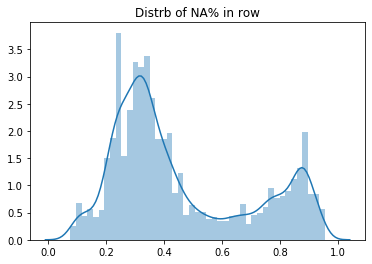

In [9]:
sns.distplot(na_by_row[['na_perc']]).set_title('Distrb of NA% in row')

### Drop columns with more than 60% NA

In [10]:
col_to_drop = na_by_col.loc[na_by_col['na_perc'] > 0.6, 'column']
cleaned_data_1 = raw_data.drop(col_to_drop, axis=1)

In [11]:
na_by_col = get_na_summary(cleaned_data_1, 0)
na_by_row = get_na_summary(cleaned_data_1, 1)

Text(0.5, 1.0, 'Distrb of NA% in col')

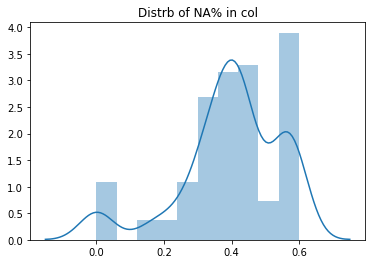

In [12]:
sns.distplot(na_by_col[['na_perc']]).set_title('Distrb of NA% in col')

Text(0.5, 1.0, 'Distrb of NA% in row')

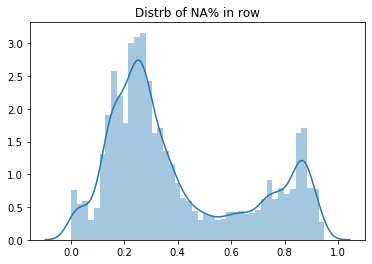

In [13]:
sns.distplot(na_by_row[['na_perc']]).set_title('Distrb of NA% in row')

## Plot the distribution of the columns

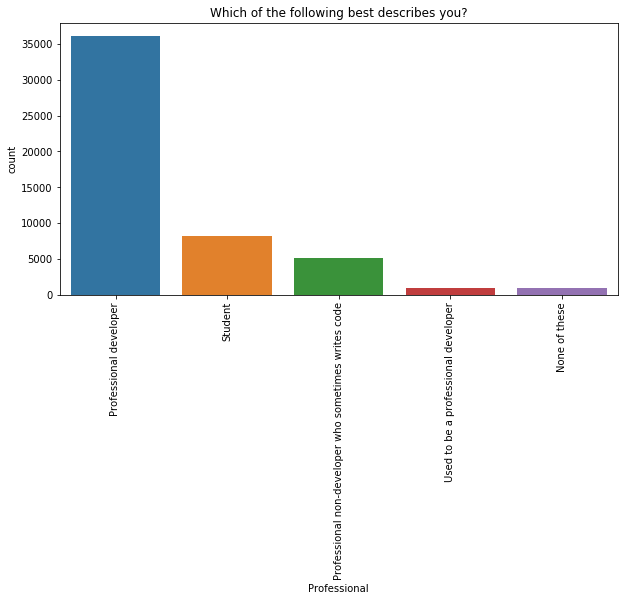

In [14]:
col_idx = 'Professional'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

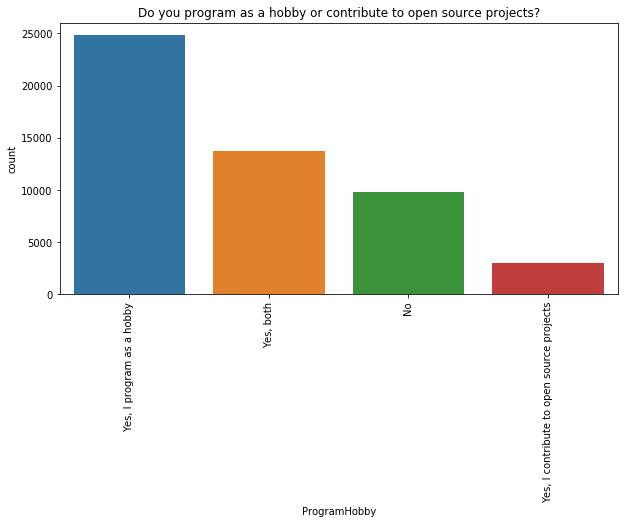

In [15]:
col_idx = 'ProgramHobby'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

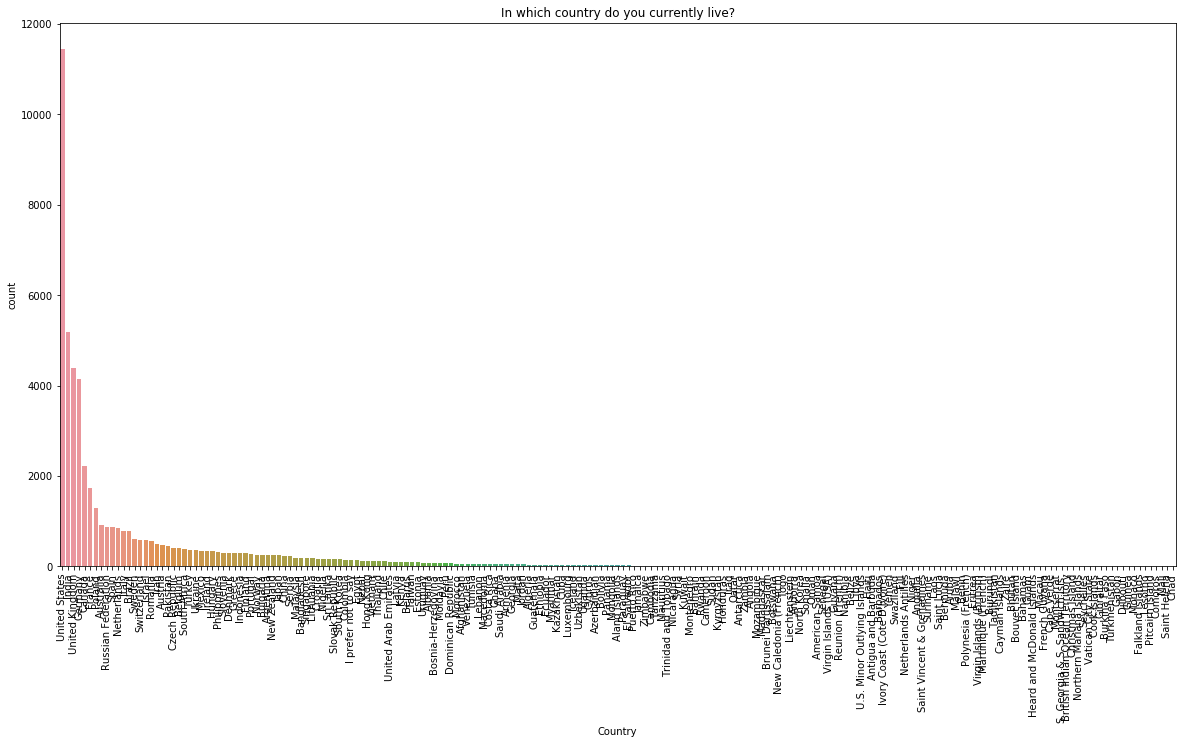

In [16]:
col_idx = 'Country'
plot_col_dist(raw_data, col_idx, fig_size=(20, 10), title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

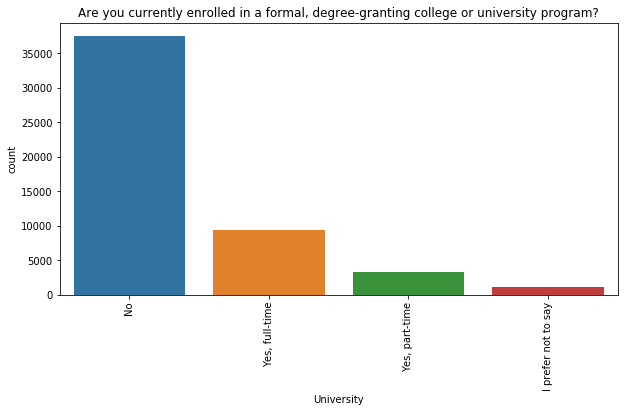

In [17]:
col_idx = 'University'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

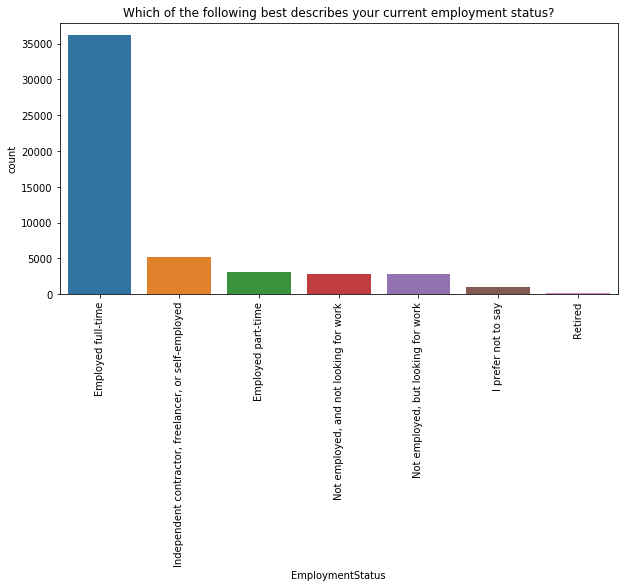

In [18]:
col_idx = 'EmploymentStatus'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

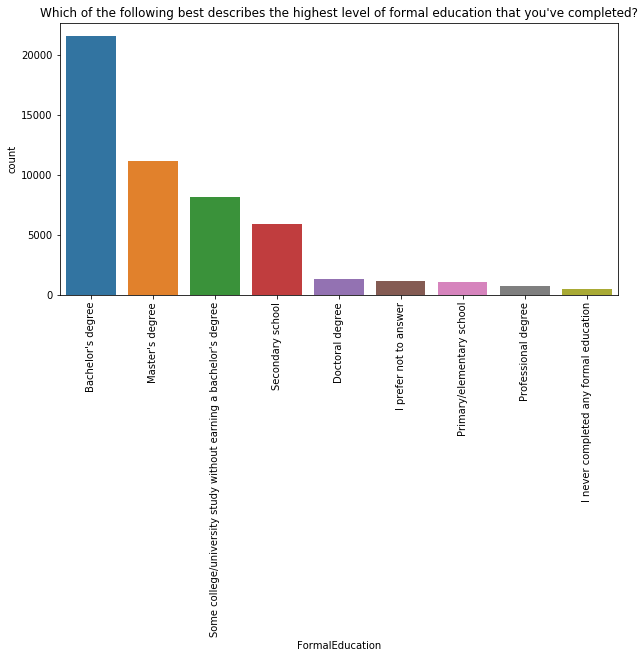

In [19]:
col_idx = 'FormalEducation'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

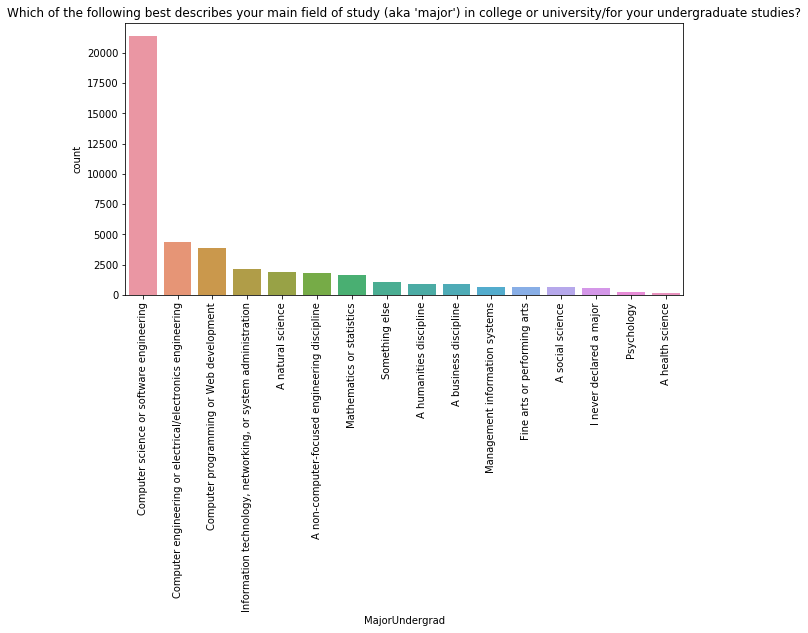

In [20]:
col_idx = 'MajorUndergrad'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

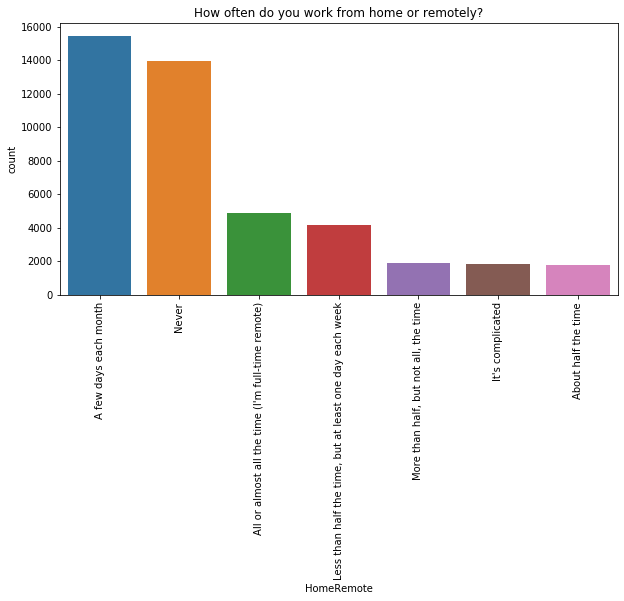

In [21]:
col_idx = 'HomeRemote'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

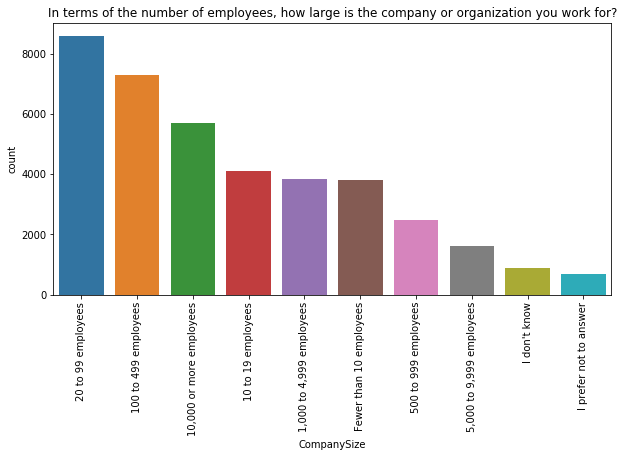

In [22]:
col_order = ['I don\'t know',
             'I prefer not to answer',
             'Fewer than 10 employees',
             '10 to 19 employees',
             '20 to 99 employees',
             '100 to 499 employees',
             '500 to 999 employees',
             '1,000 to 4,999 employees',
             '5,000 to 9,999 employees',
             '10,000 or more employees']

col_idx = 'CompanySize'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

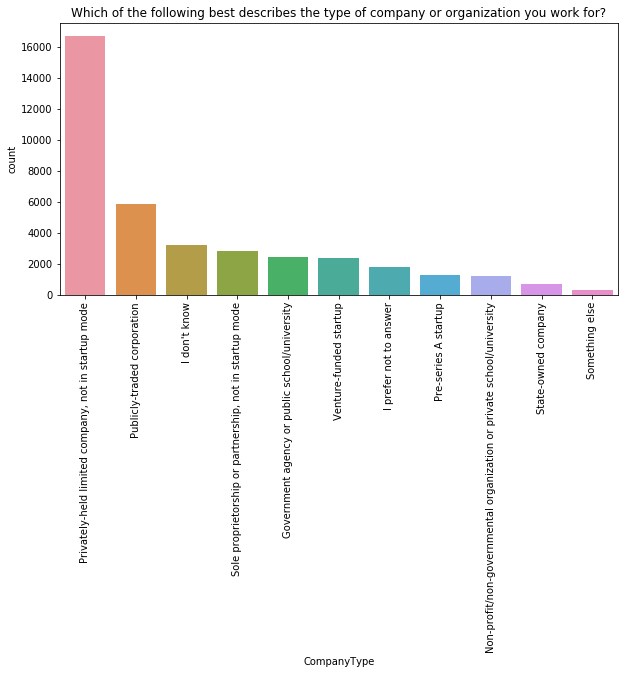

In [23]:
col_idx = 'CompanyType'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

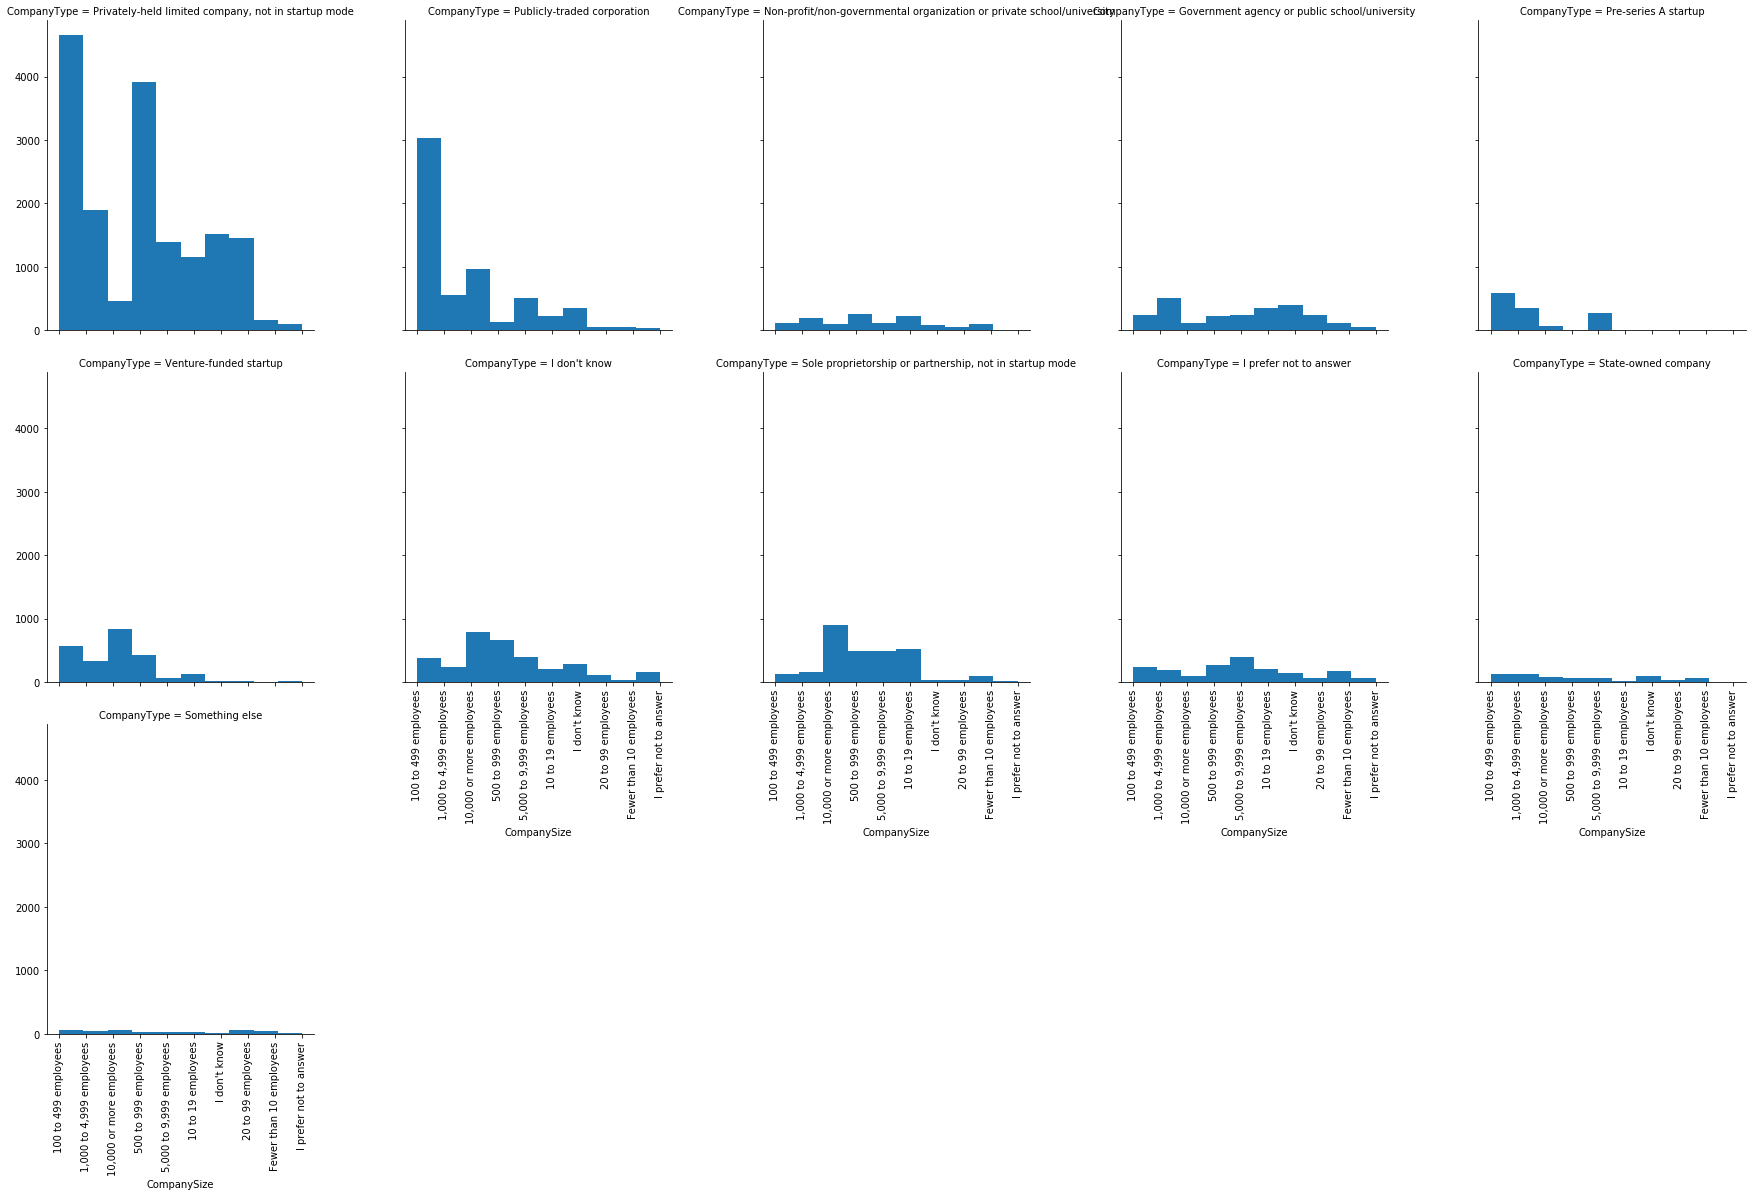

In [24]:
g = sns.FacetGrid(data=raw_data, col='CompanyType',height=5, col_wrap=5)
g = g.map(plt.hist, "CompanySize")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

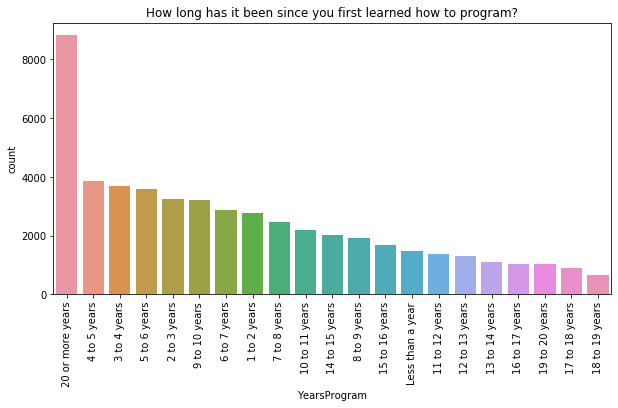

In [25]:
col_order = ['Less than a year',
             '1 to 2 years',
             '2 to 3 years',
             '3 to 4 years',
             '4 to 5 years',
             '5 to 6 years',
             '6 to 7 years',
             '7 to 8 years',
             '8 to 9 years',
             '9 to 10 years',
             '10 to 11 years',
             '11 to 12 years',
             '12 to 13 years',
             '13 to 14 years',
             '14 to 15 years',
             '15 to 16 years',
             '16 to 17 years',
             '17 to 18 years',
             '18 to 19 years',
             '19 to 20 years',
             '20 or more years', 
            'NA']

col_idx = 'YearsProgram'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

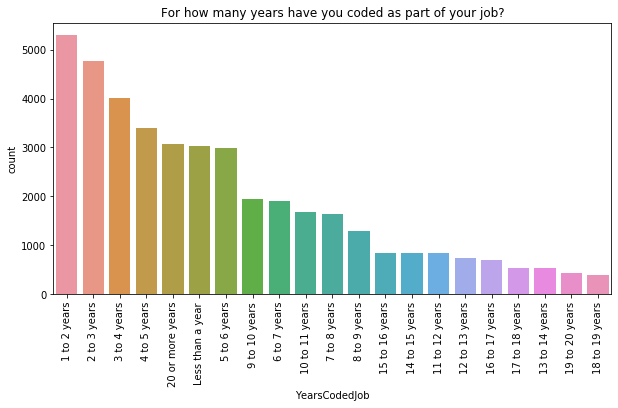

In [26]:
col_idx = 'YearsCodedJob'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

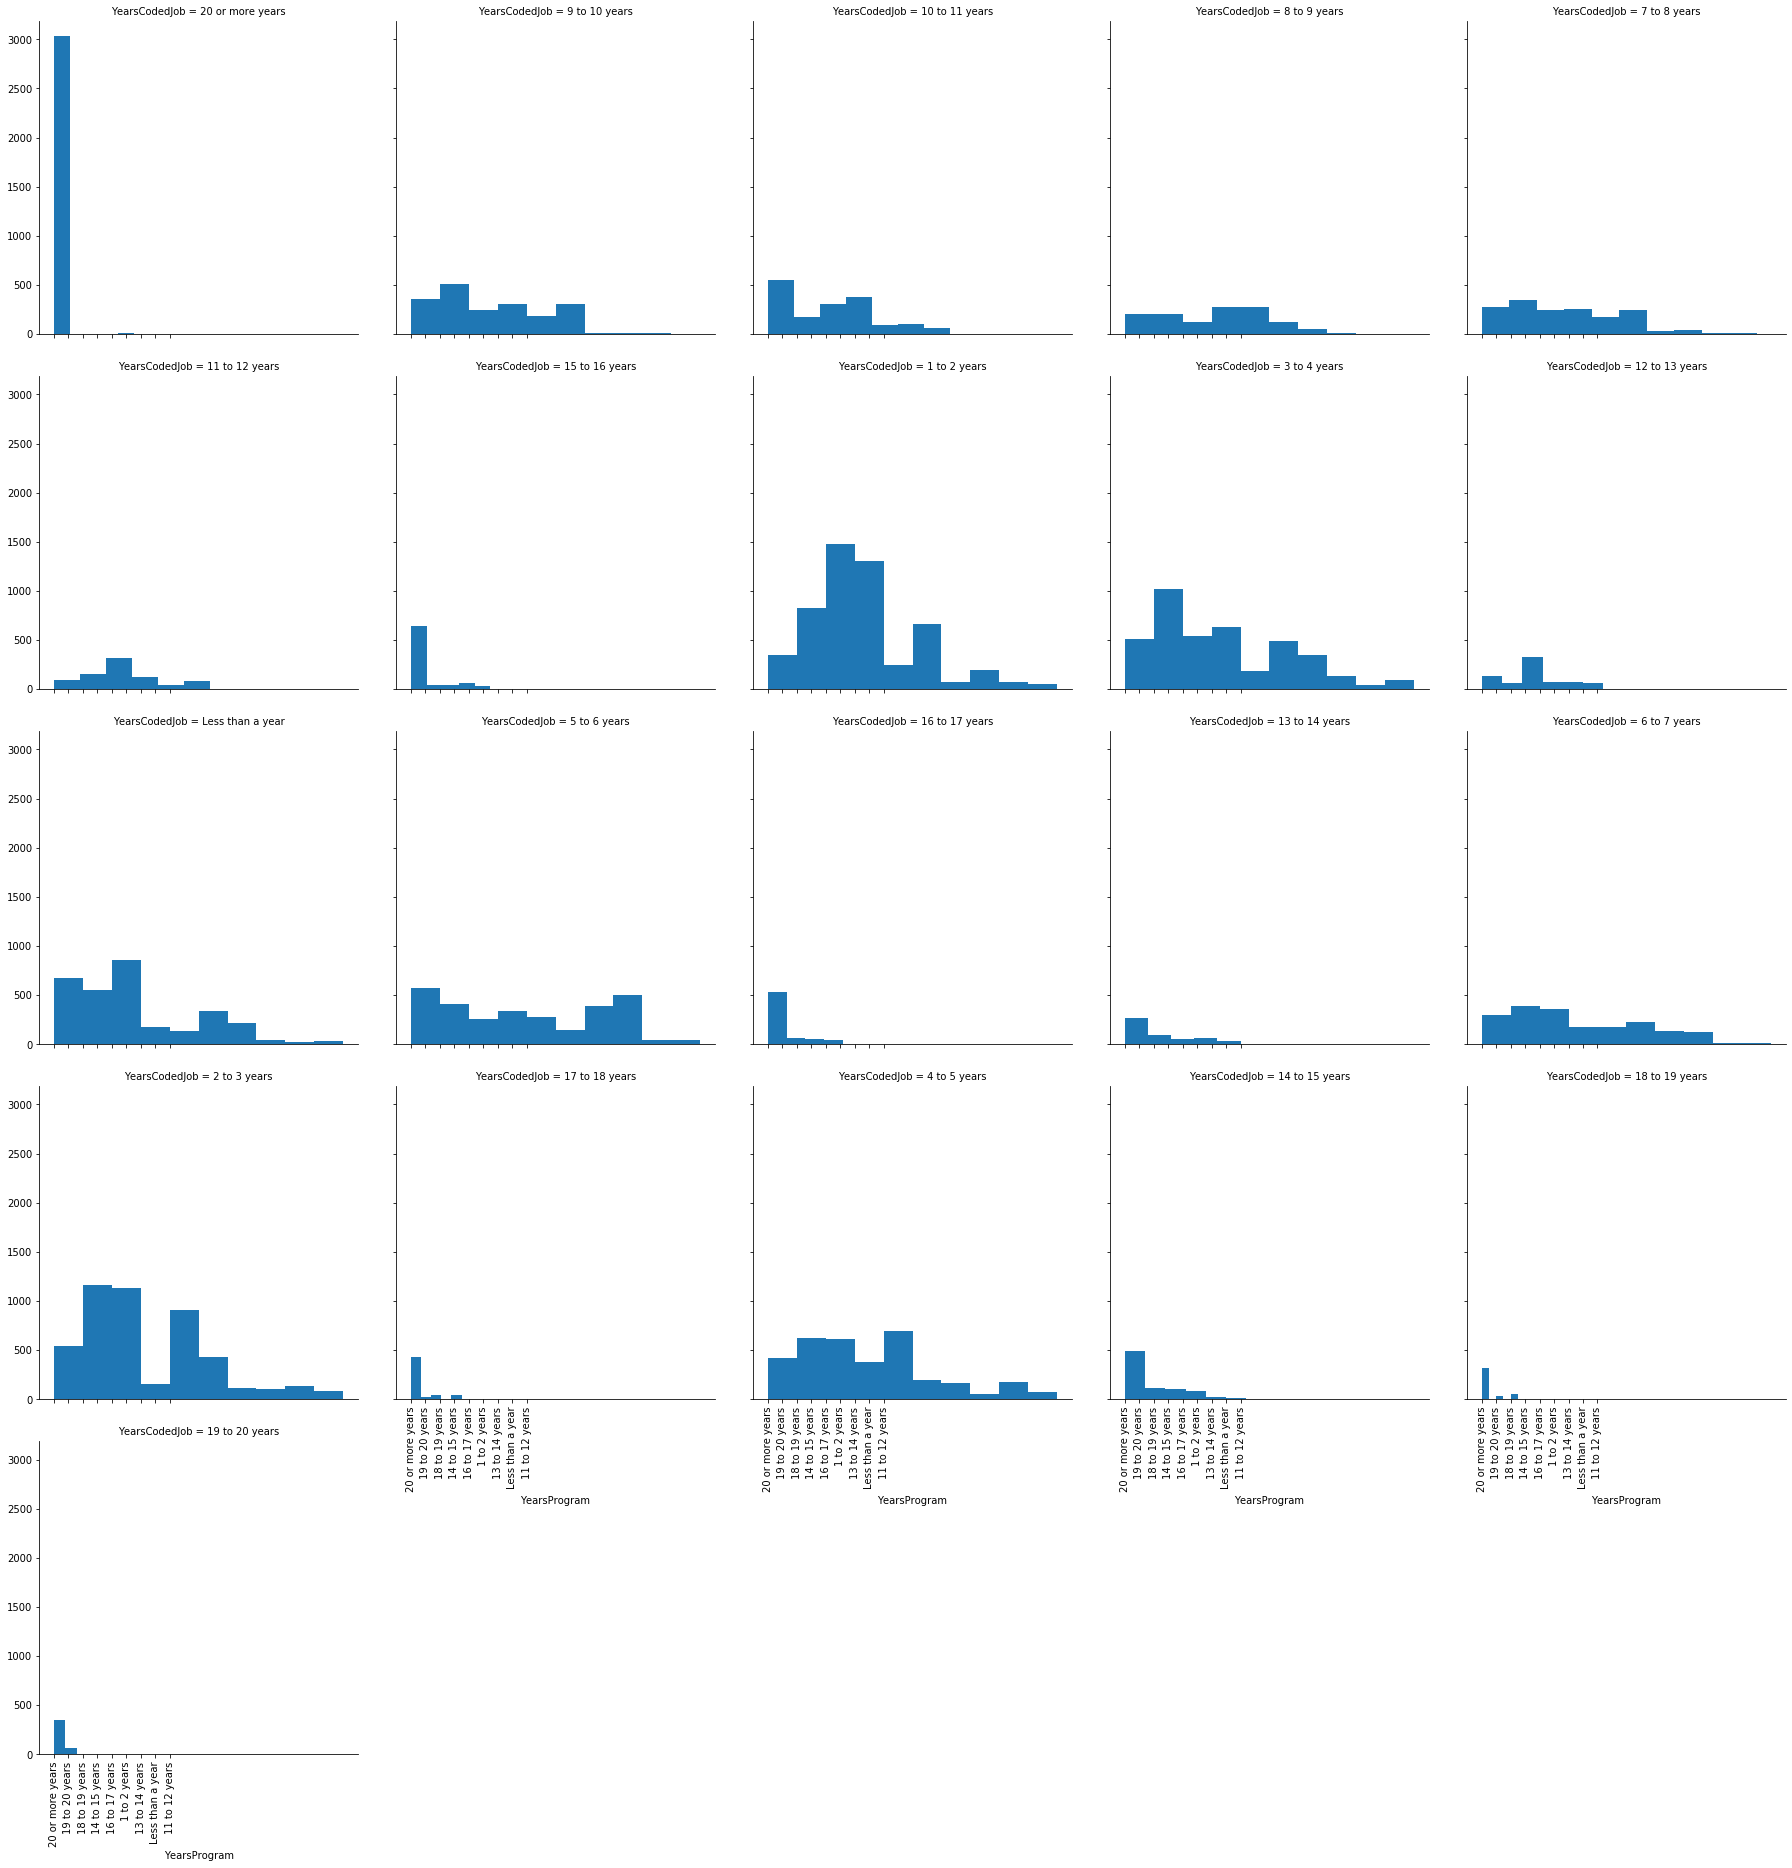

In [27]:
g = sns.FacetGrid(data=raw_data, col='YearsCodedJob',height=5, col_wrap=5)
g = g.map(plt.hist, "YearsProgram")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

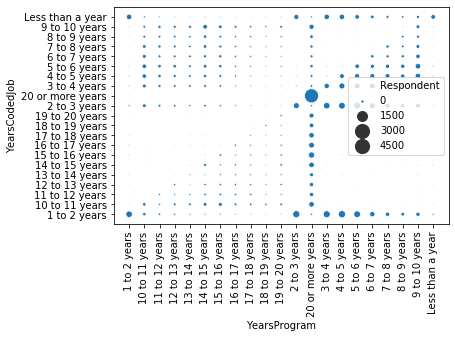

In [28]:
plot_df = raw_data[['Respondent', 'YearsCodedJob', 'YearsProgram']]
plot_df = plot_df.groupby(['YearsCodedJob', 'YearsProgram']).count()
plot_df.reset_index(inplace=True)
# display(plot_df)
g = sns.scatterplot(data=plot_df, x='YearsProgram', y='YearsCodedJob', size="Respondent", sizes=(1, 200))
plt.xticks(rotation=90)

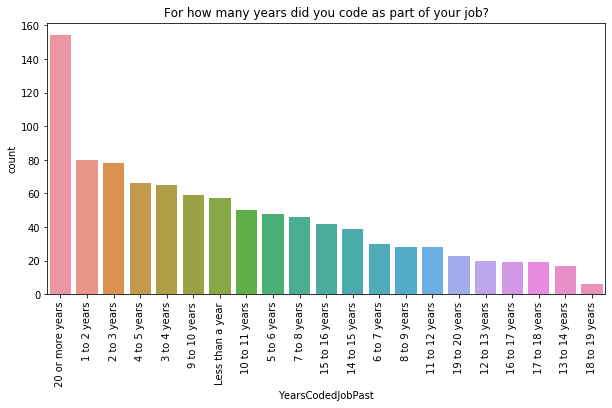

In [29]:
col_idx = 'YearsCodedJobPast'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

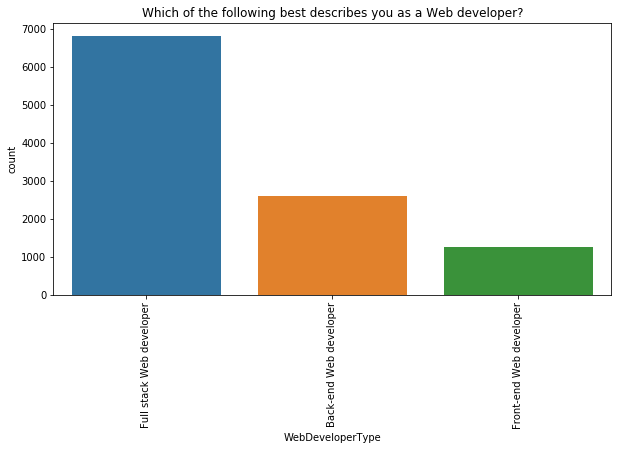

In [30]:
col_idx = 'WebDeveloperType'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

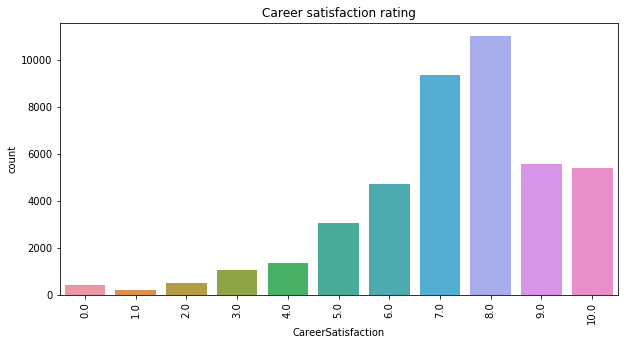

In [31]:
col_idx = 'CareerSatisfaction'
plot_col_dist(raw_data, col_idx, sort=False, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

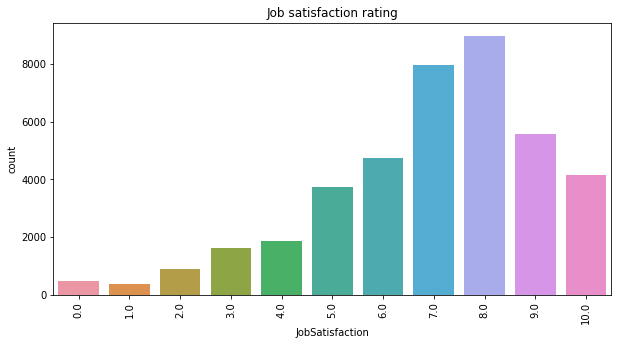

In [32]:
col_idx = 'JobSatisfaction'
plot_col_dist(raw_data, col_idx, sort=False, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

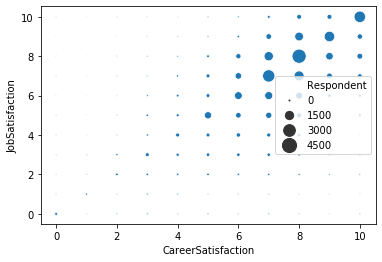

In [33]:
# pair plot 
plot_df = raw_data[['Respondent', 'CareerSatisfaction', 'JobSatisfaction']]
plot_df = plot_df.groupby(['CareerSatisfaction', 'JobSatisfaction']).count()
plot_df.reset_index(inplace=True)
# display(plot_df)
sns.scatterplot(data=plot_df, x='CareerSatisfaction', y='JobSatisfaction', size="Respondent", sizes=(1, 200))

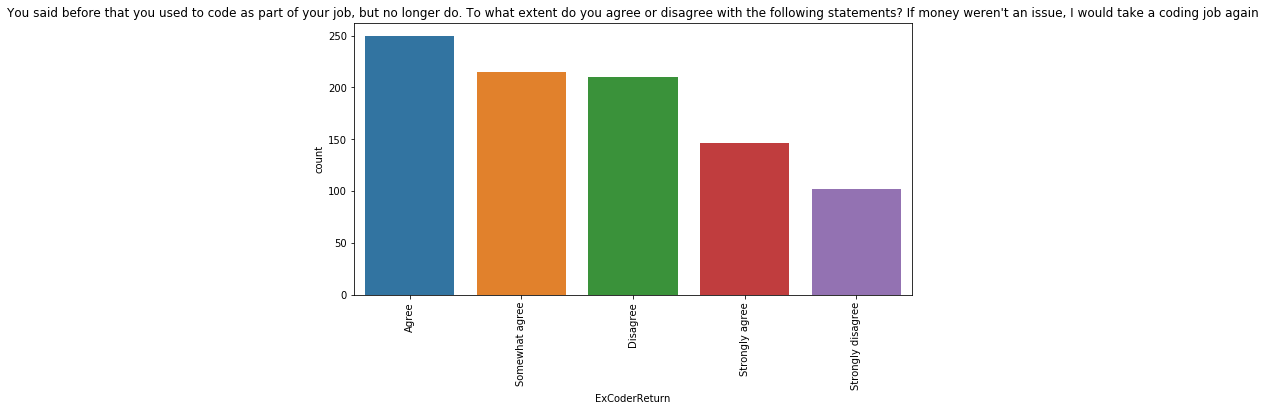

In [34]:
col_order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree','Strongly agree']

col_idx = 'ExCoderReturn'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

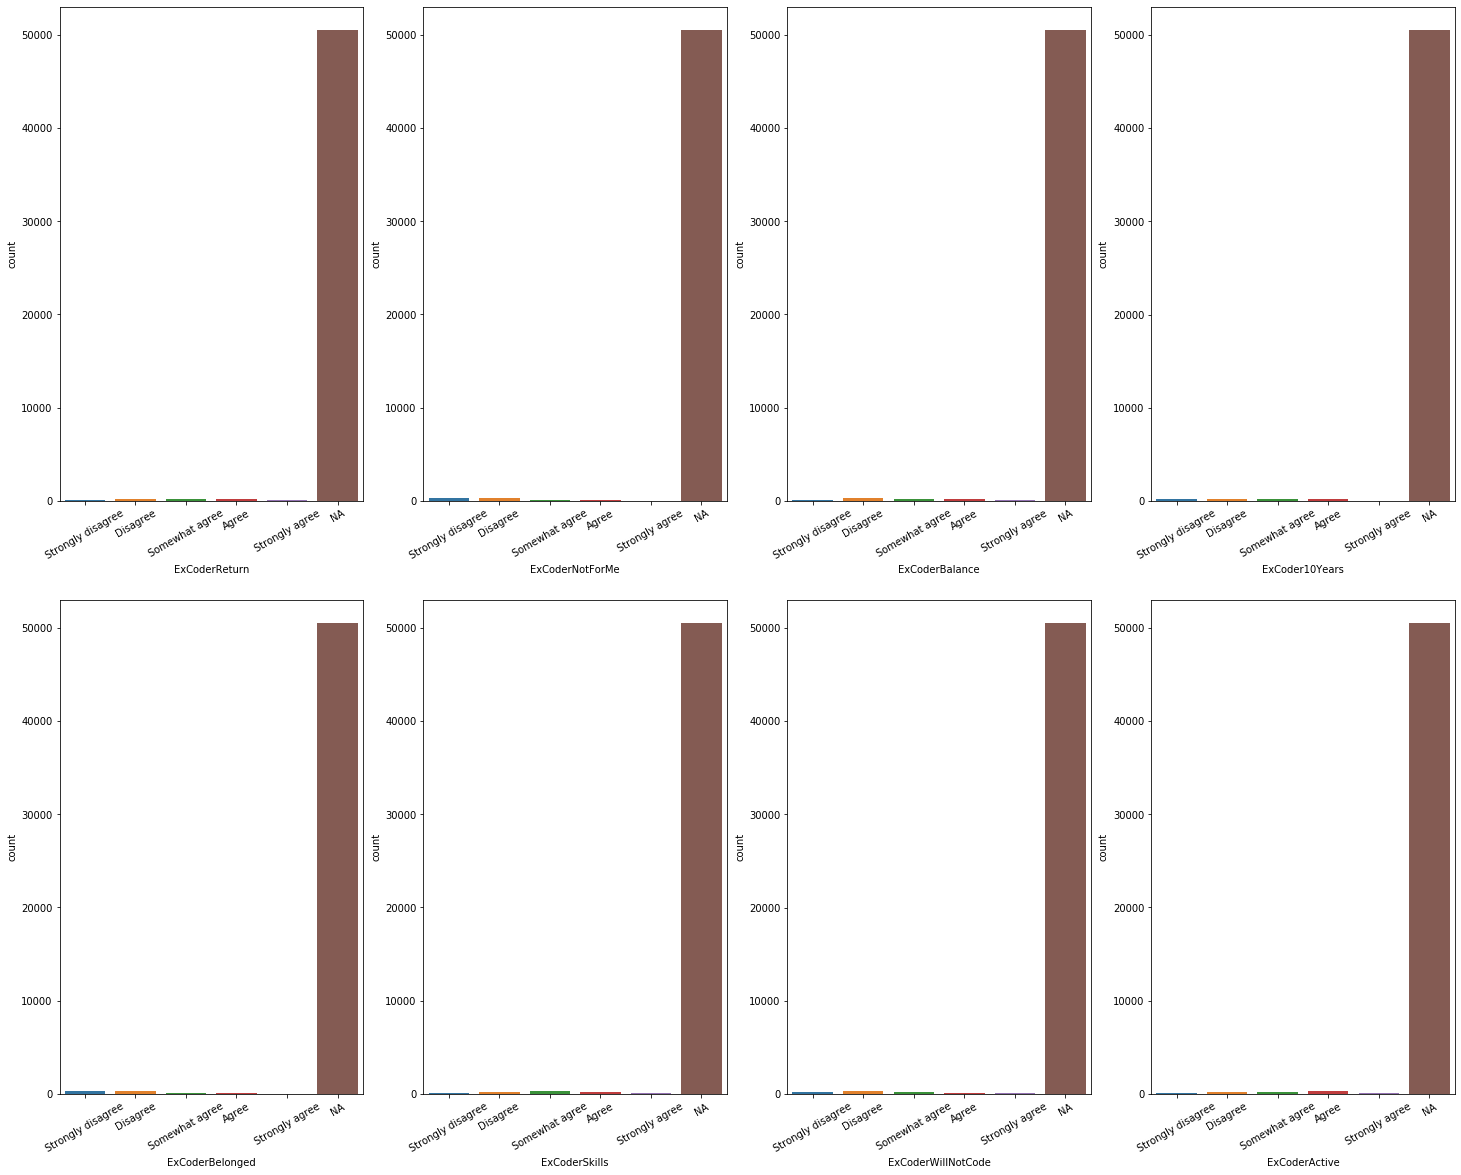

In [35]:
plot_data_dist_grid(raw_data, 
               col_idx=['ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance',
                        'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
                        'ExCoderWillNotCode', 'ExCoderActive'],
              order=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree', 'NA'],
              n_col=4, n_row=2)

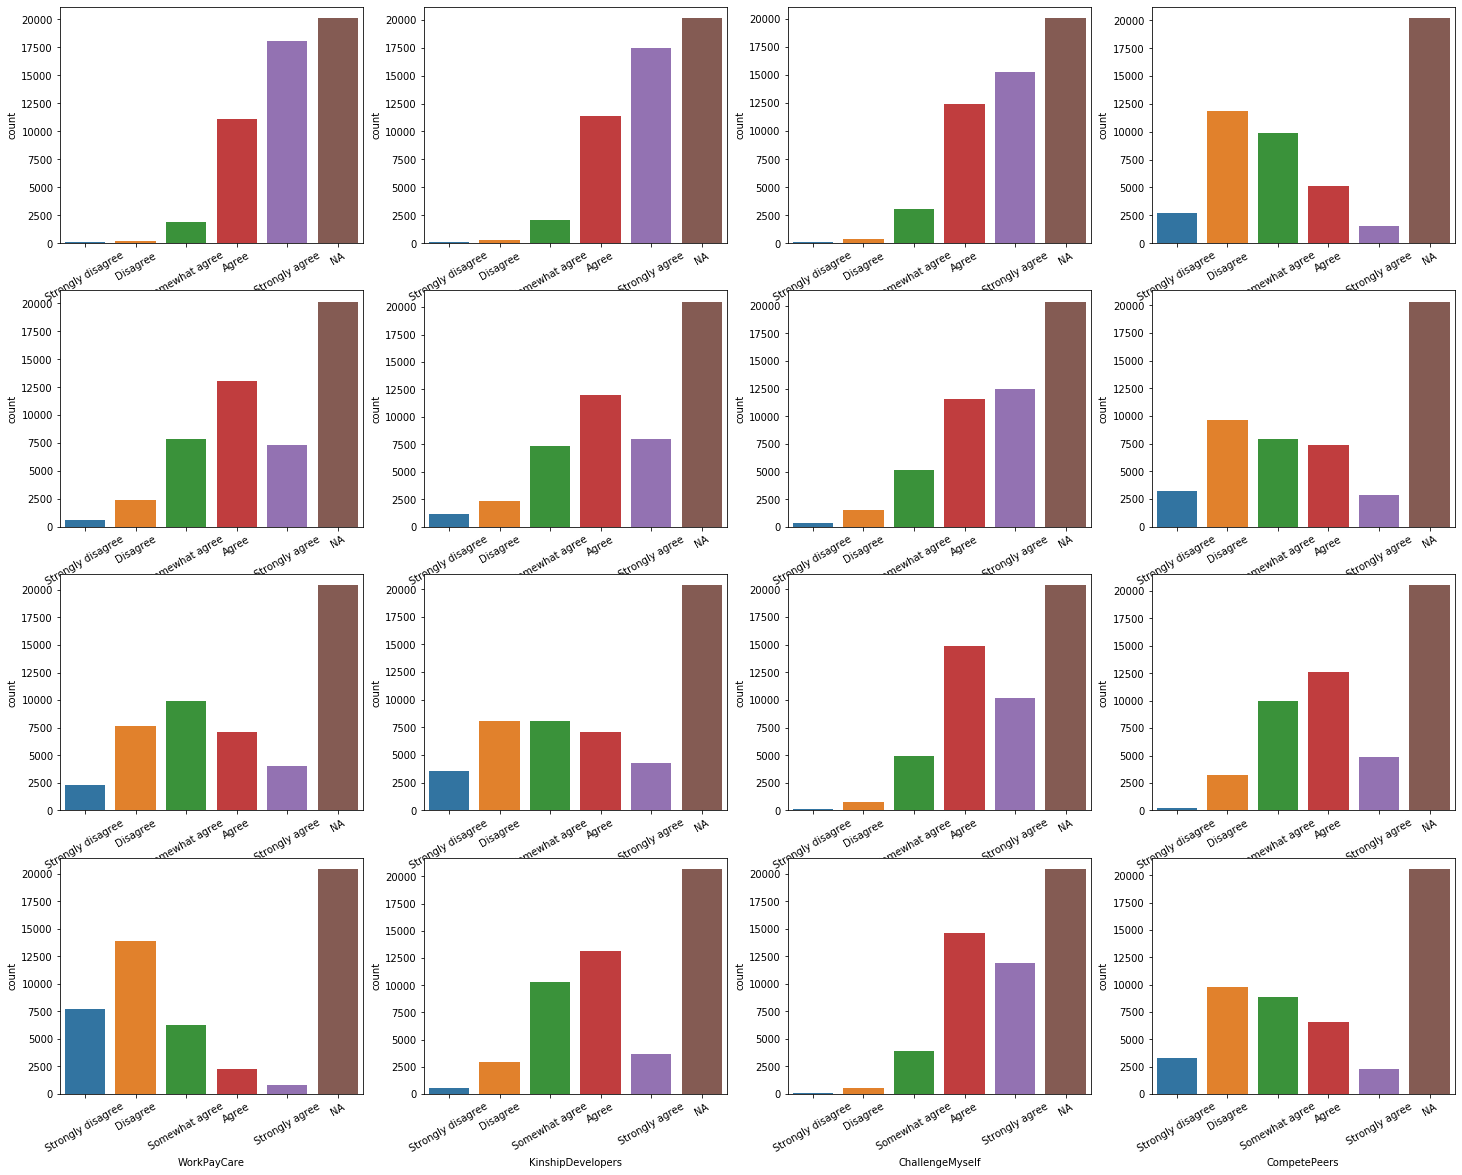

In [36]:
plot_data_dist_grid(raw_data, 
               col_idx = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity',
                          'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers',
                          'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself',
                          'CompetePeers'],
              order=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree', 'NA'],
              n_col=4, n_row=4)

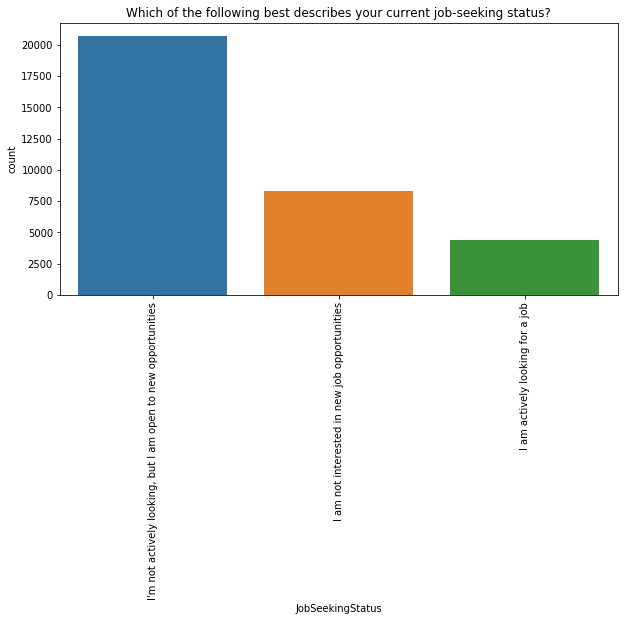

In [37]:
col_idx = 'JobSeekingStatus'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

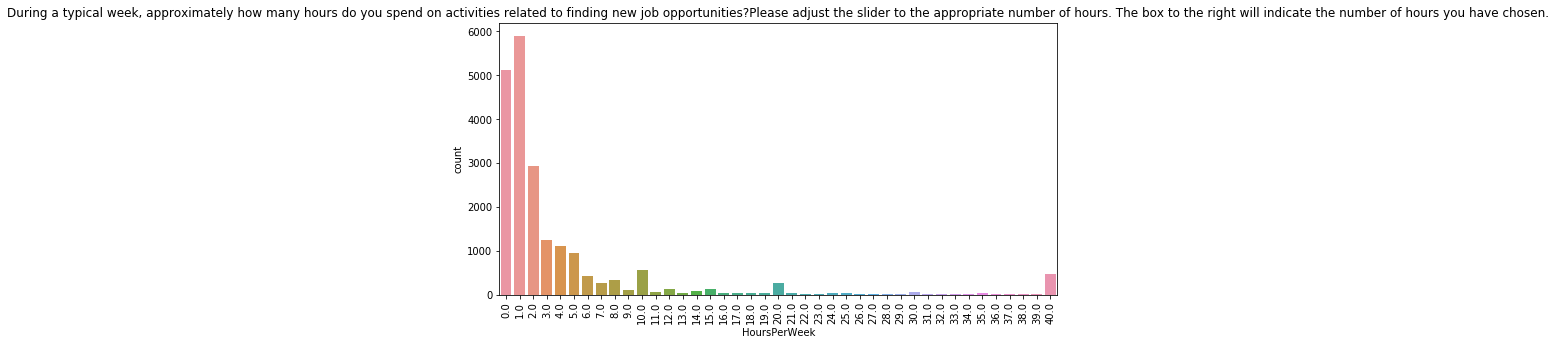

In [38]:
col_idx = 'HoursPerWeek'
plot_col_dist(raw_data, col_idx, sort=False, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

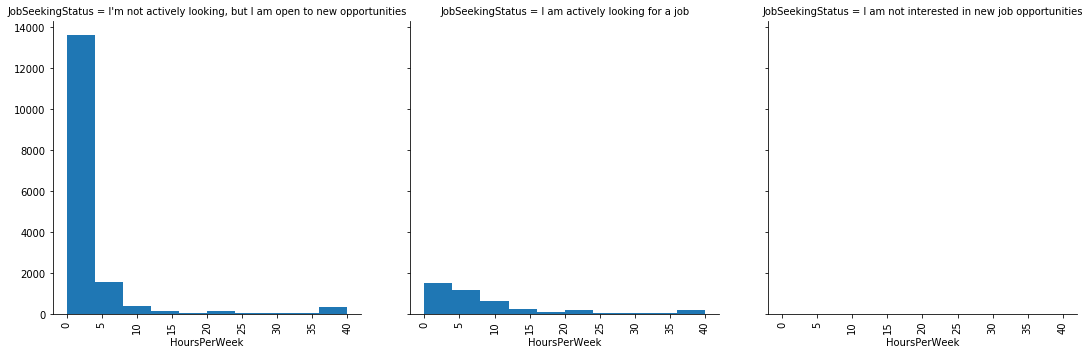

In [76]:
g = sns.FacetGrid(data=raw_data, col='JobSeekingStatus', height=5, col_wrap=5)
g = g.map(plt.hist, "HoursPerWeek")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

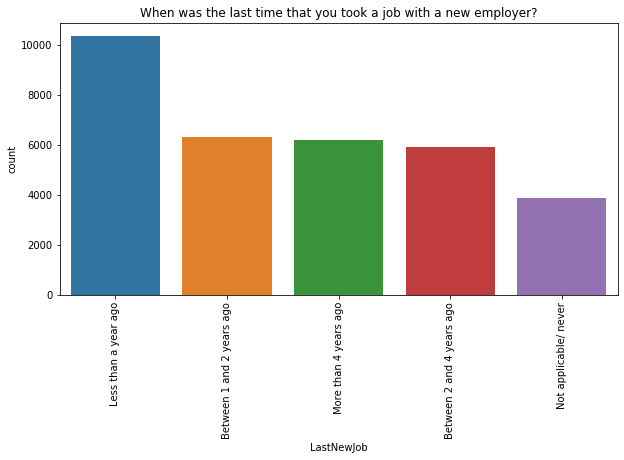

In [39]:
col_order = ['NA', 'Not applicable/ never', 'Less than a year ago', 'Between 1 and 2 years ago', 'Between 2 and 4 years ago', 'More than 4 years ago']

col_idx = 'LastNewJob'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

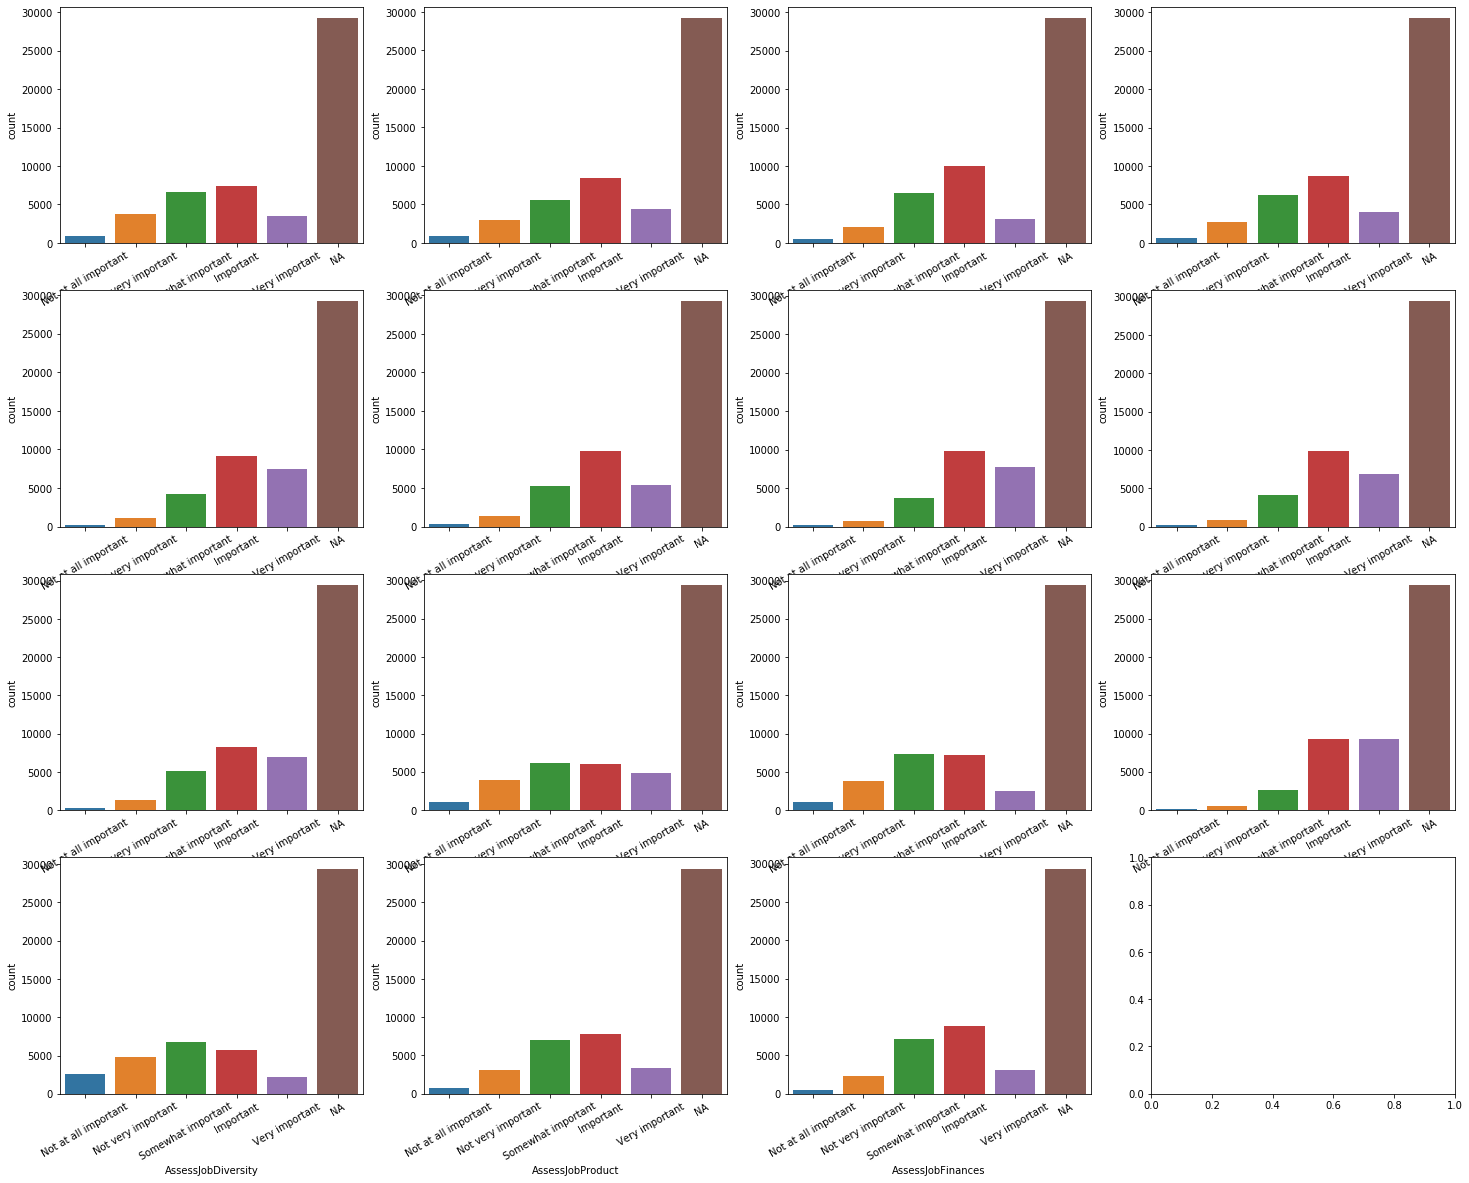

In [40]:
plot_data_dist_grid(raw_data, 
               col_idx = ['AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech',
                          'AssessJobProjects', 'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute',
                          'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel', 'AssessJobDiversity',
                          'AssessJobProduct', 'AssessJobFinances'],
              order=['Not at all important', 'Not very important', 'Somewhat important',  'Important',  'Very important', 'NA'],
              n_col=4, n_row=4)

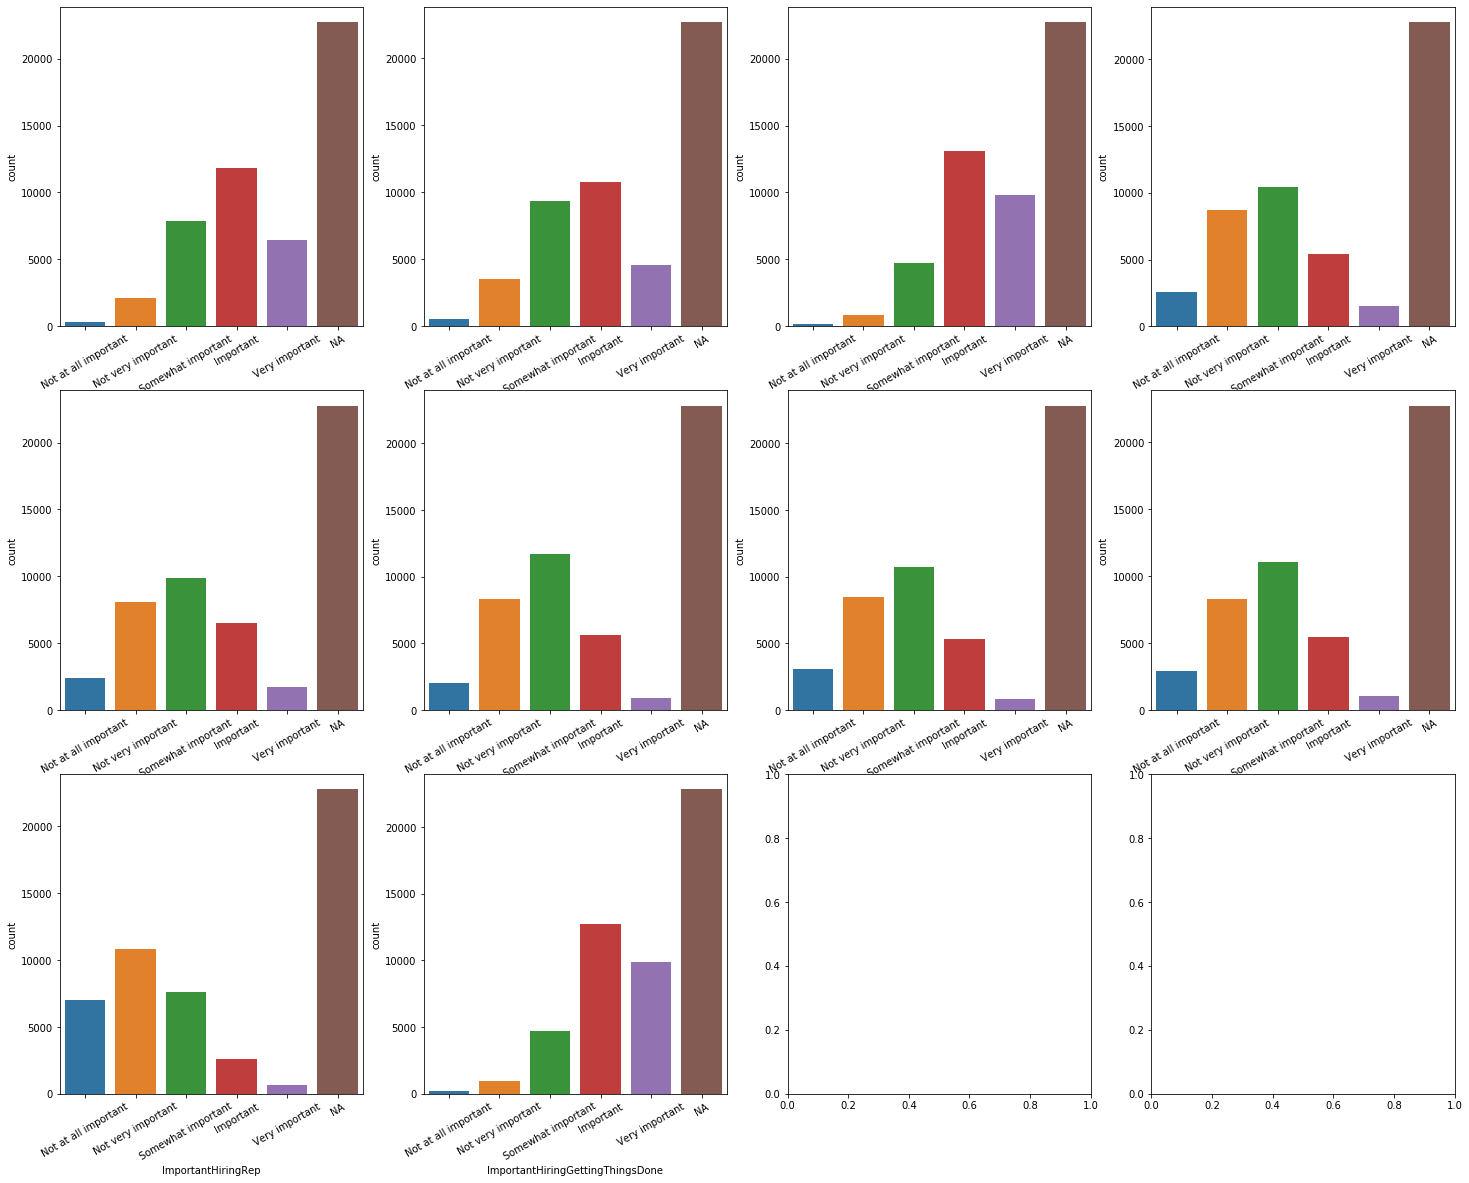

In [41]:
plot_data_dist_grid(raw_data, 
               col_idx = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication',
                          'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies',
                          'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep',
                          'ImportantHiringGettingThingsDone'],
              order=['Not at all important', 'Not very important', 'Somewhat important',  'Important',  'Very important', 'NA'],
              n_col=4, n_row=3)

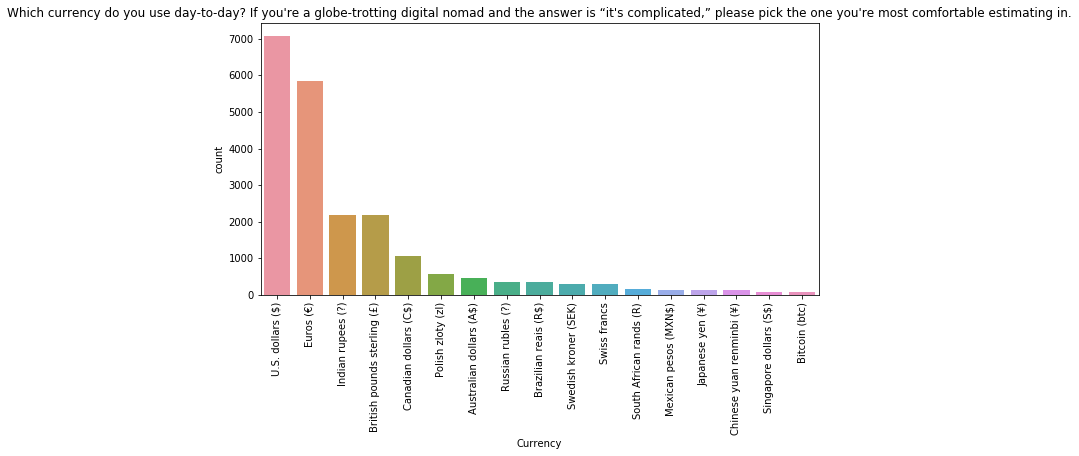

In [42]:
col_idx = 'Currency'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

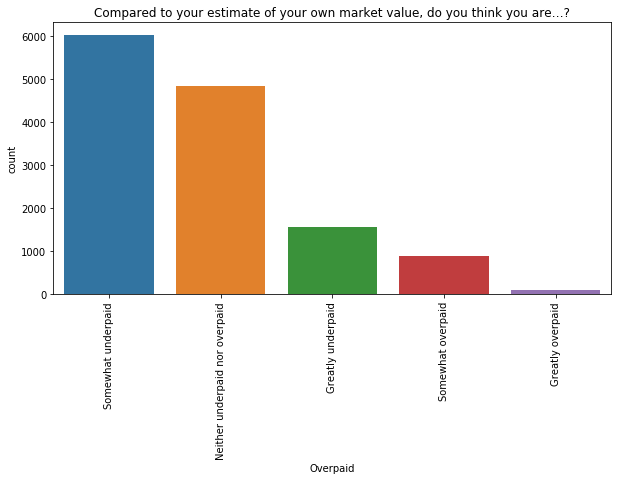

In [43]:
col_order = ['Greatly underpaid', 'Somewhat underpaid', 'Neither underpaid nor overpaid', 'Somewhat overpaid', 'Greatly overpaid']
col_idx = 'Overpaid'
plot_col_dist(raw_data, col_idx, col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

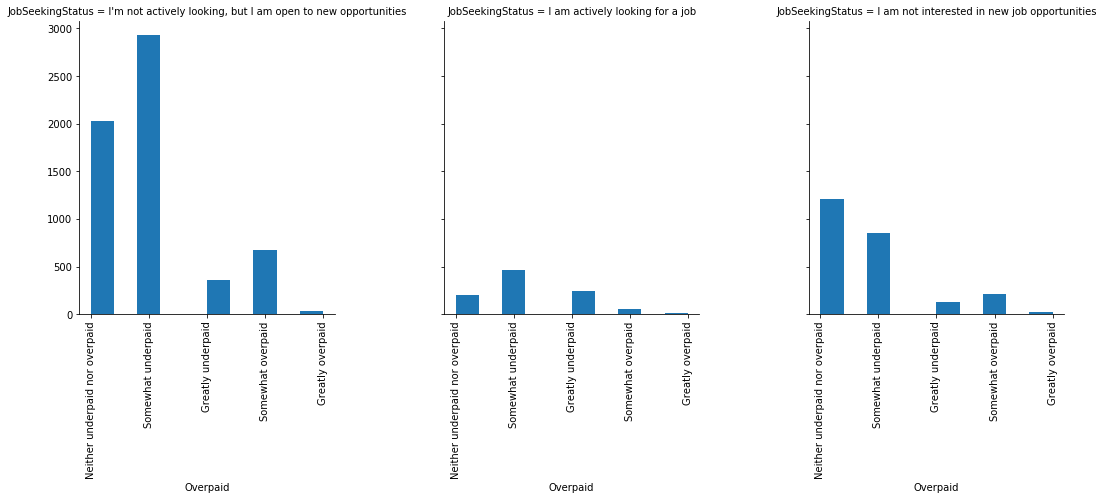

In [77]:
g = sns.FacetGrid(data=raw_data, col='JobSeekingStatus', height=5, col_wrap=5)
g = g.map(plt.hist, "Overpaid")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

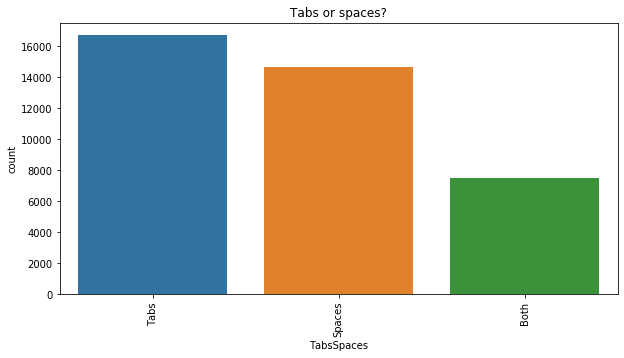

In [44]:
col_idx = 'TabsSpaces'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

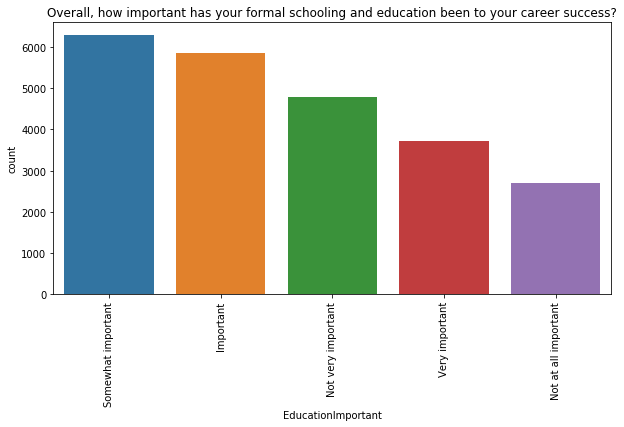

In [45]:
col_order = ['Not at all important', 'Not very important', 'Somewhat important',  'Important',  'Very important', 'NA']

col_idx = 'EducationImportant'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

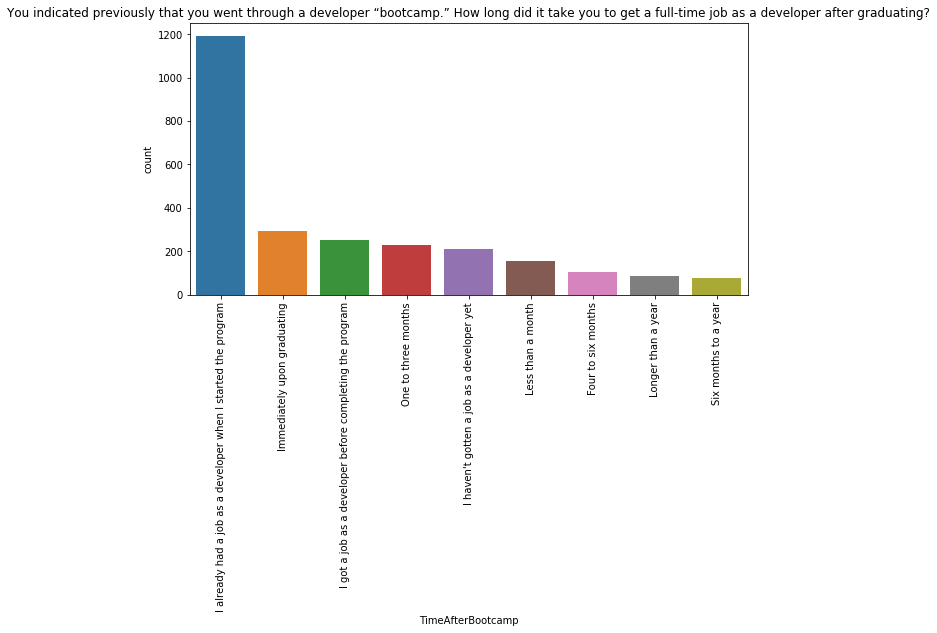

In [46]:
col_order = ['I already had a job as a developer when I started the program', 
             'I got a job as a developer before completing the program',
             'Immediately upon graduating', 
             'Less than a month', 'One to three months', 'Four to six months', 'Six months to a year', 'Longer than a year', 
             "I haven't gotten a job as a developer yet",
             'NA']

col_idx = 'TimeAfterBootcamp'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

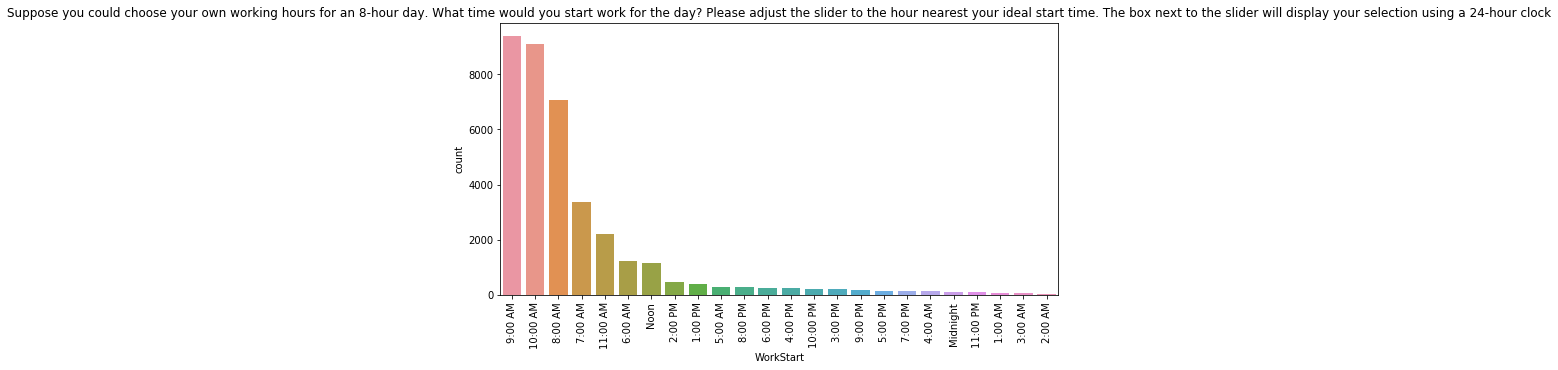

In [47]:
col_order = ['1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM',
             '11:00 AM', 'Noon',
             '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM',
             '11:00 PM', 'Midnight',
             'NA']

col_idx = 'WorkStart'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

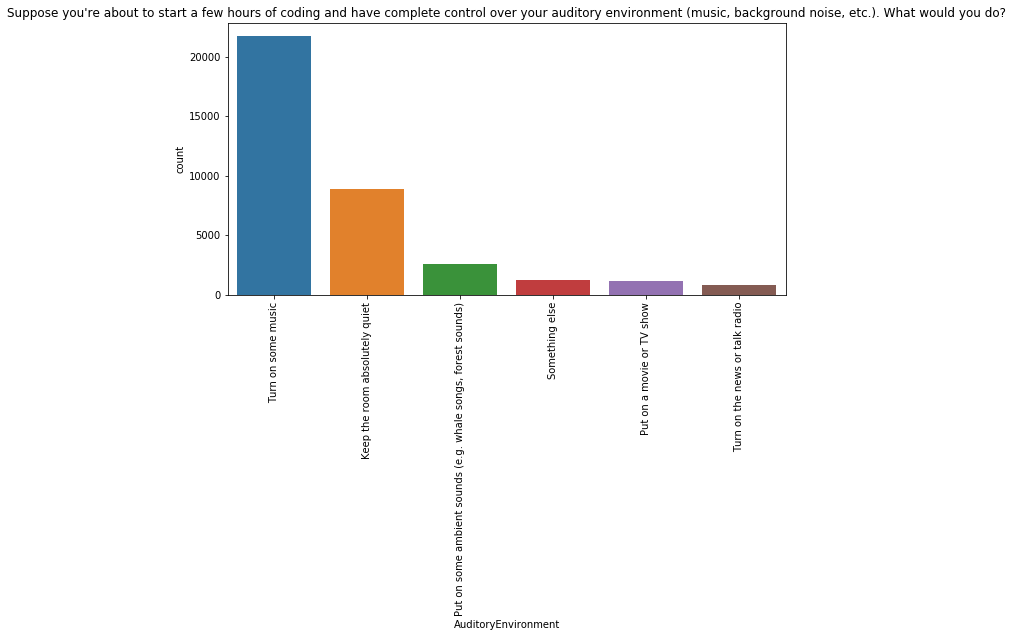

In [48]:
col_idx = 'AuditoryEnvironment'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

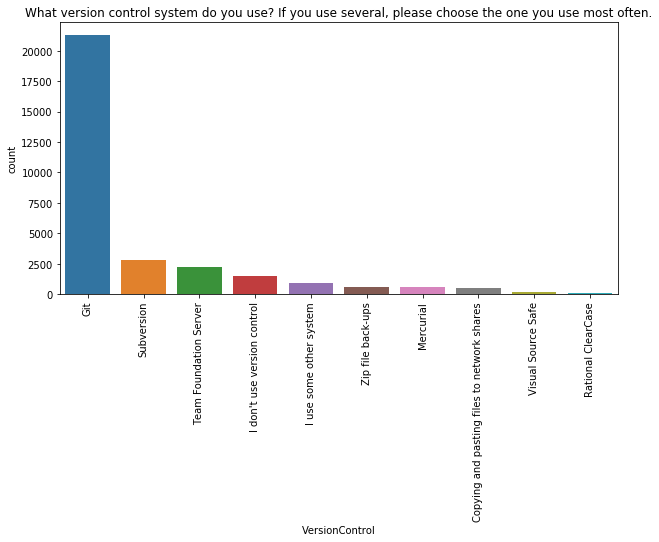

In [49]:
col_idx = 'VersionControl'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

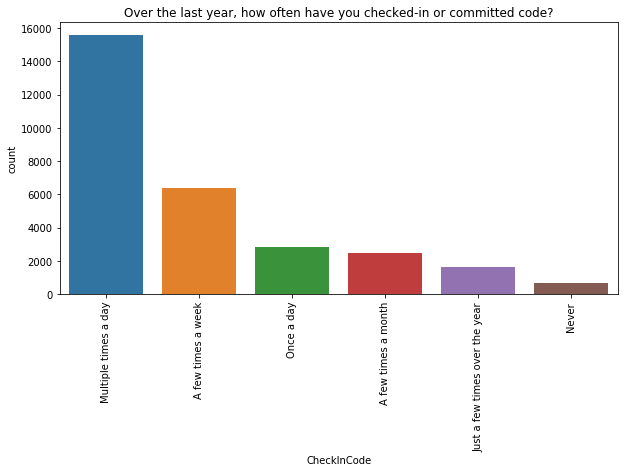

In [50]:
col_order = ['Never', 'Just a few times over the year', 'A few times a month', 'A few times a week', 'Once a day', 'Multiple times a day', 'NA']

col_idx = 'CheckInCode'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

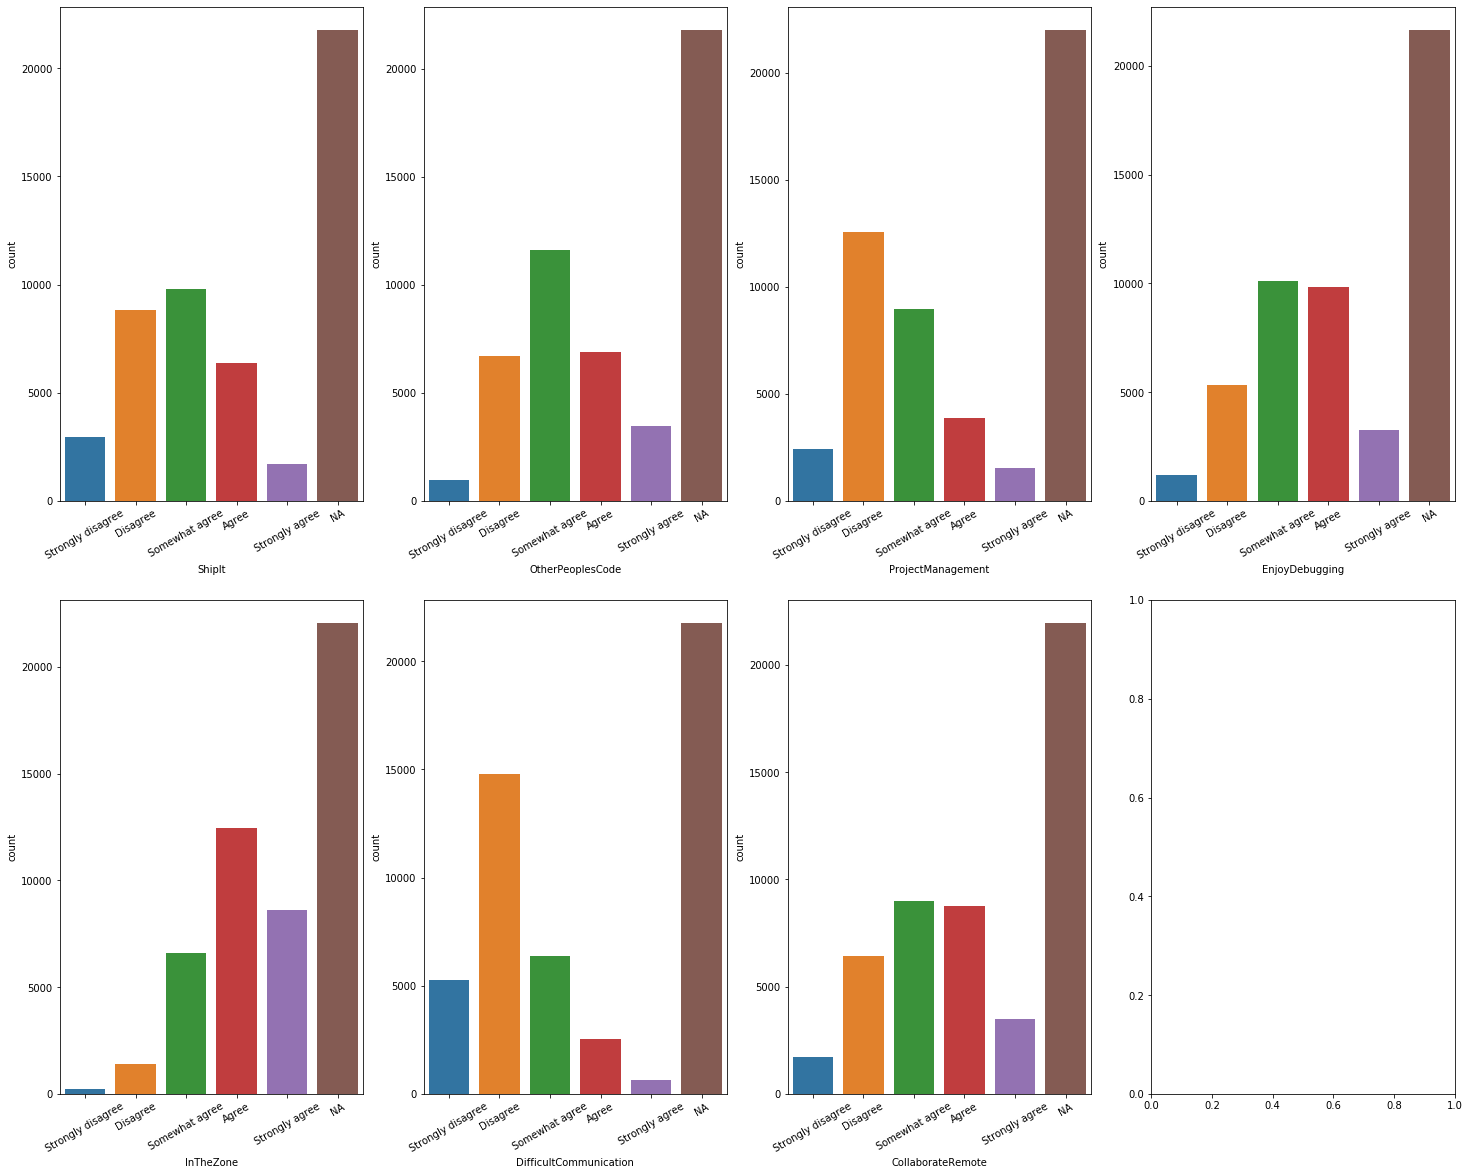

In [51]:
plot_data_dist_grid(raw_data, 
               col_idx = ['ShipIt', 'OtherPeoplesCode', 'ProjectManagement', 'EnjoyDebugging', 
                          'InTheZone', 'DifficultCommunication', 'CollaborateRemote'],
               order=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree', 'NA'],
               n_col=4, n_row=2)

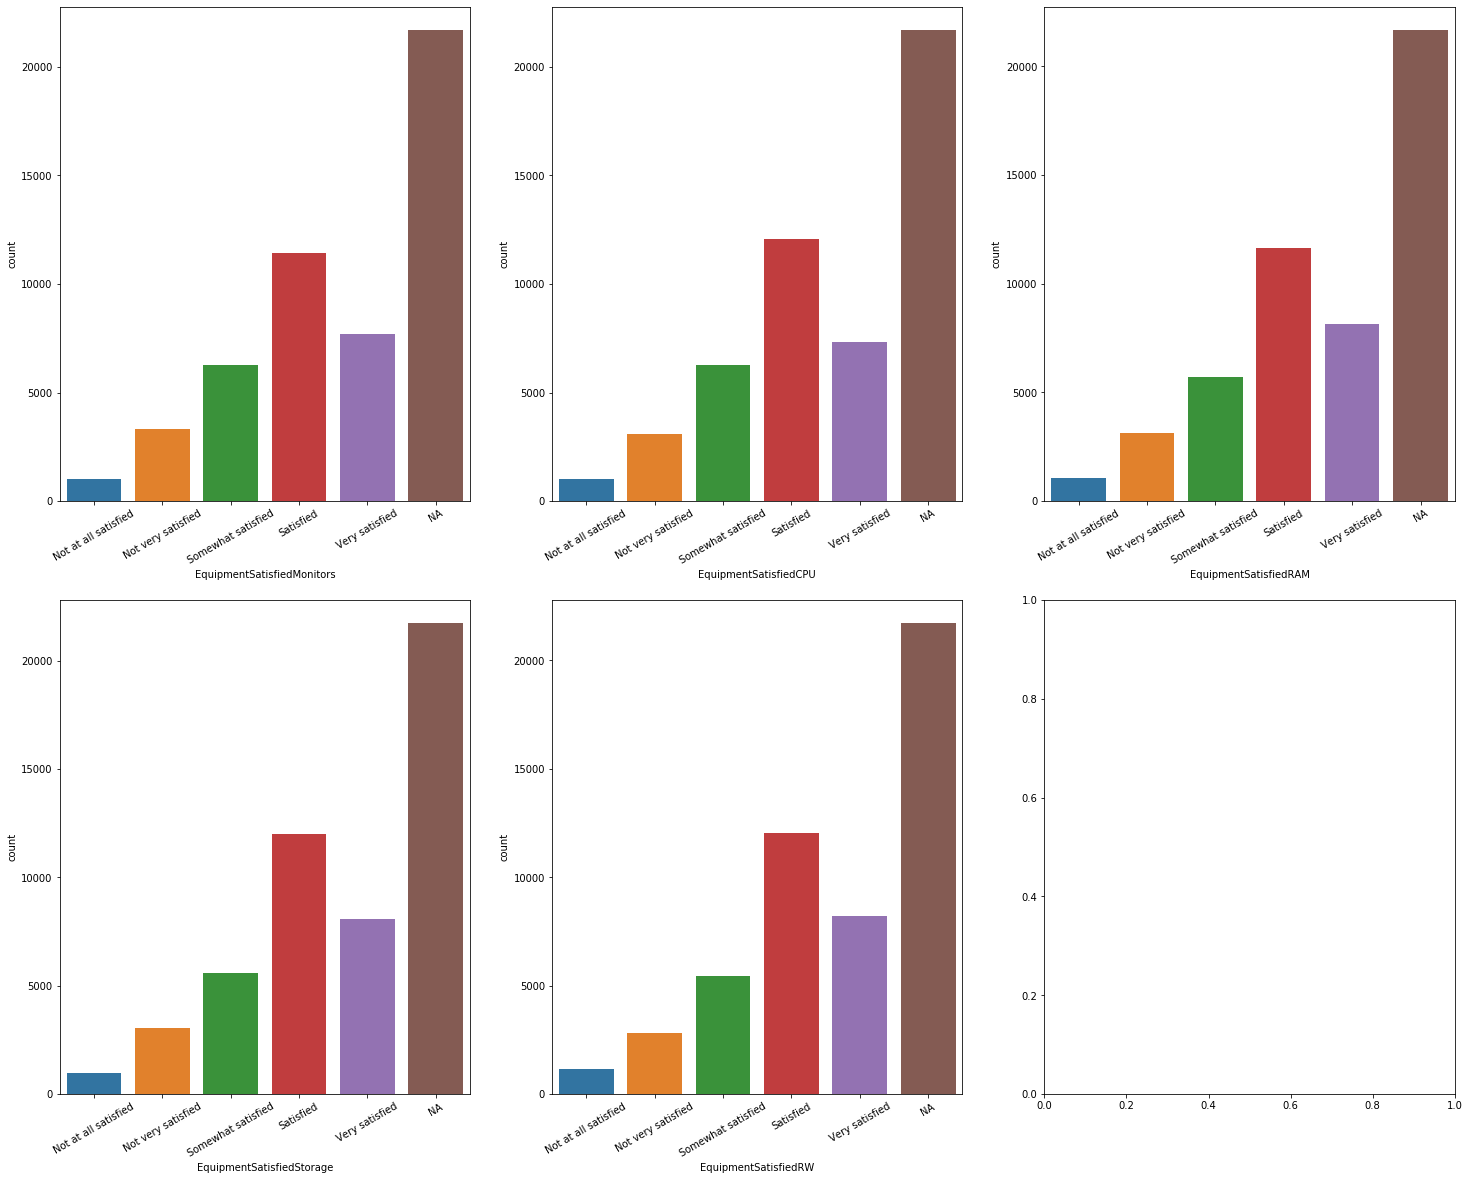

In [52]:
plot_data_dist_grid(raw_data, 
               col_idx = ['EquipmentSatisfiedMonitors', 'EquipmentSatisfiedCPU', 'EquipmentSatisfiedRAM', 
                          'EquipmentSatisfiedStorage', 'EquipmentSatisfiedRW'],
               order=['Not at all satisfied', 'Not very satisfied', 'Somewhat satisfied',  'Satisfied', 'Very satisfied', 'NA'],
               n_col=3, n_row=2)

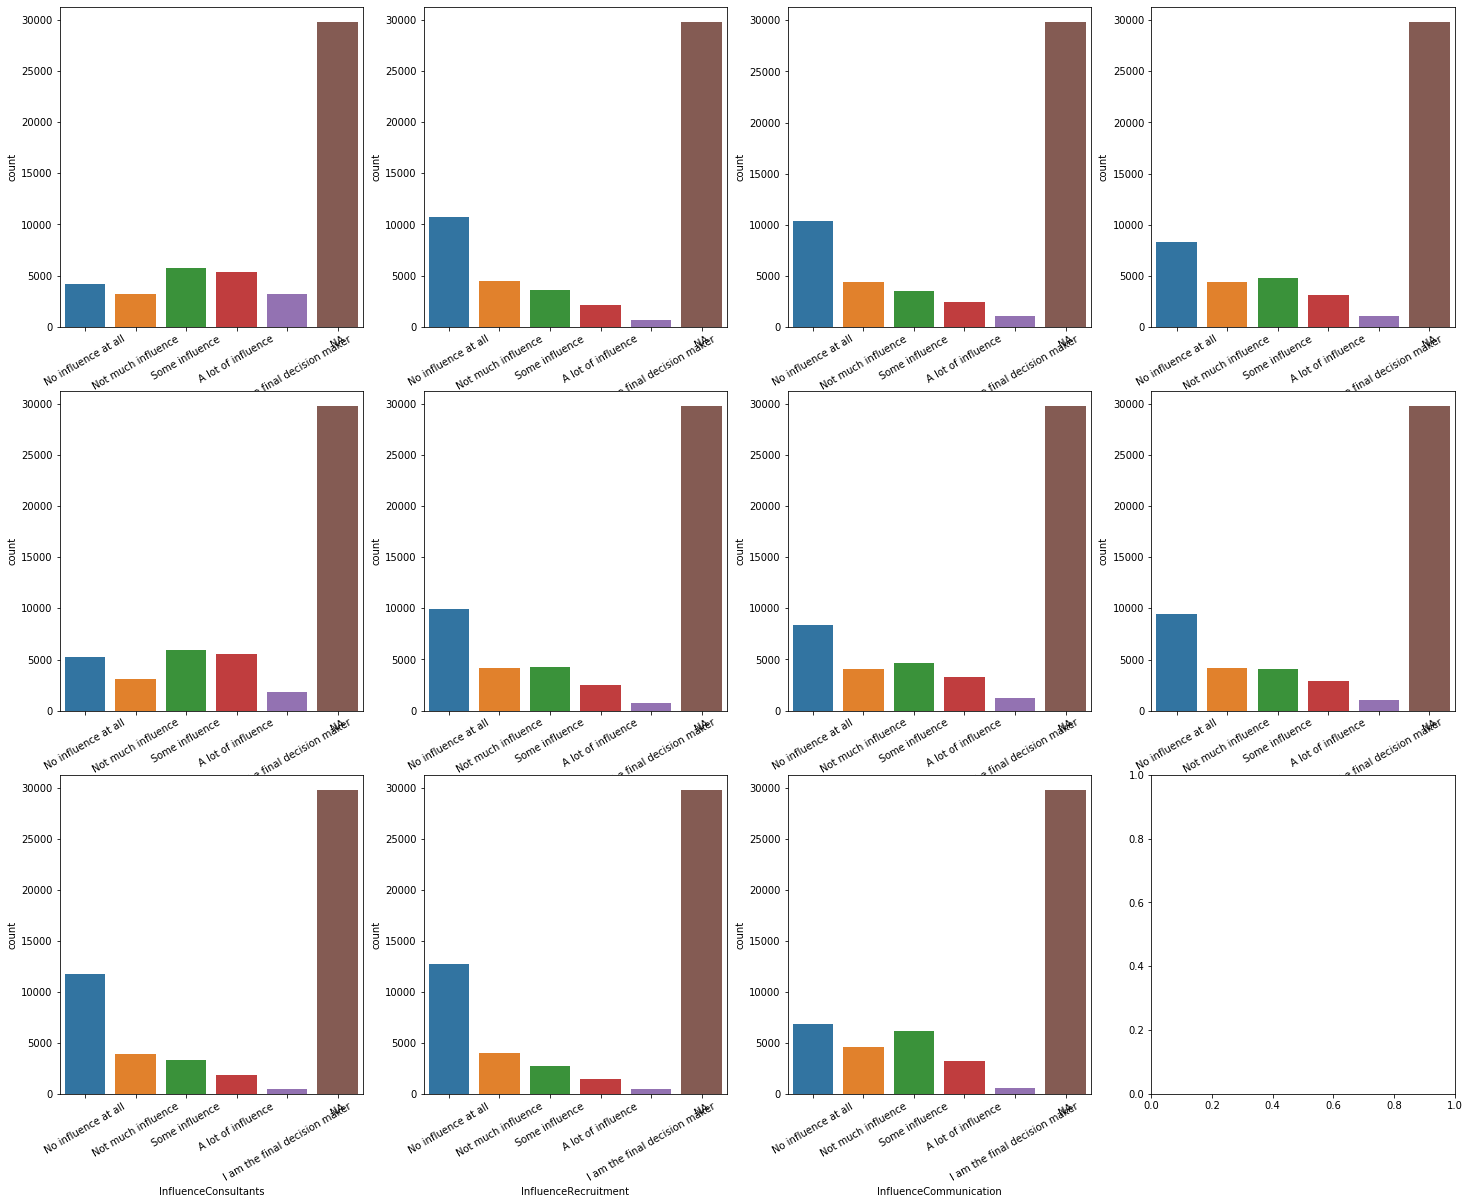

In [53]:
plot_data_dist_grid(raw_data, 
               col_idx = ['InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack', 
                          'InfluenceDeptTech', 'InfluenceVizTools', 'InfluenceDatabase', 'InfluenceCloud', 
                          'InfluenceConsultants', 'InfluenceRecruitment', 'InfluenceCommunication'],
               order=['No influence at all', 'Not much influence', 'Some influence', 'A lot of influence', 'I am the final decision maker', 'NA'],
               n_col=4, n_row=3)

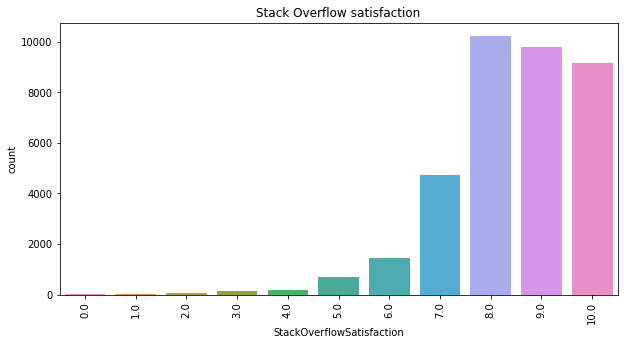

In [54]:
col_idx = 'StackOverflowSatisfaction'
plot_col_dist(raw_data, col_idx, sort=False, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

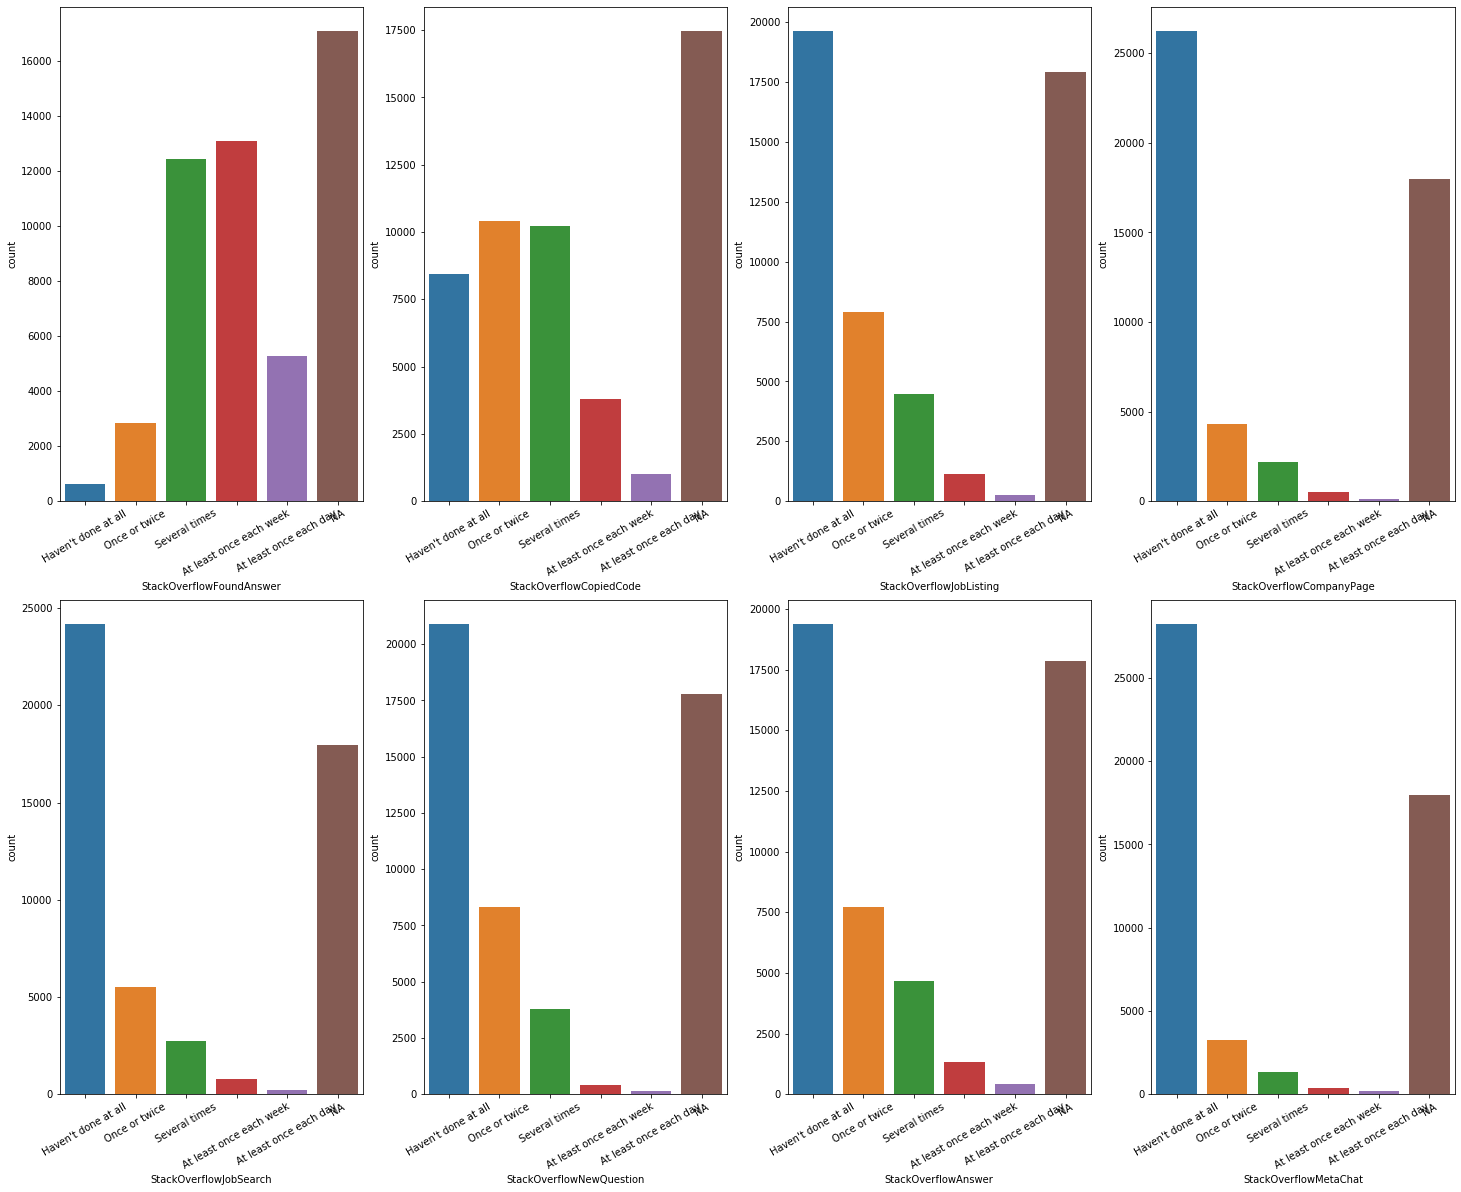

In [55]:
plot_data_dist_grid(raw_data, 
               col_idx = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 'StackOverflowJobListing', 
                          'StackOverflowCompanyPage', 'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                          'StackOverflowAnswer', 'StackOverflowMetaChat'],
               order=['Haven\'t done at all', 'Once or twice', 'Several times', 'At least once each week',  'At least once each day', 'NA'],
               n_col=4, n_row=2)

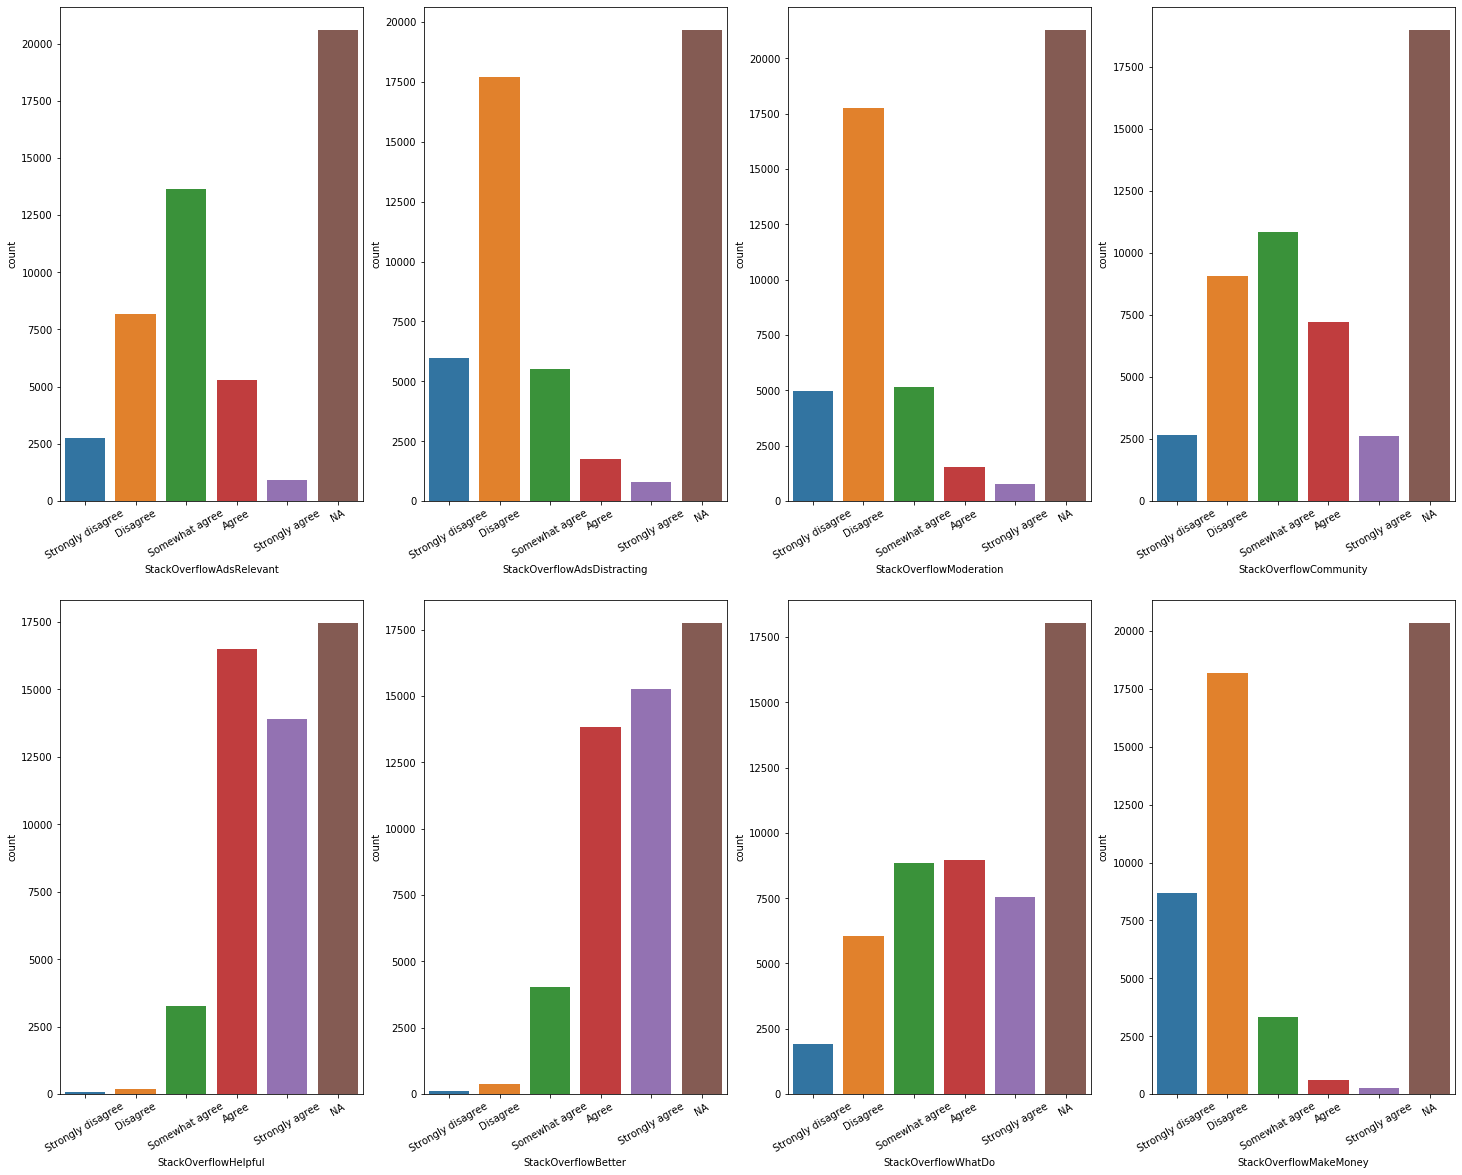

In [56]:
plot_data_dist_grid(raw_data, 
               col_idx = ['StackOverflowAdsRelevant', 'StackOverflowAdsDistracting', 'StackOverflowModeration', 
                          'StackOverflowCommunity', 'StackOverflowHelpful', 'StackOverflowBetter', 
                          'StackOverflowWhatDo', 'StackOverflowMakeMoney'],
               order=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree', 'NA'],
               n_col=4, n_row=2)

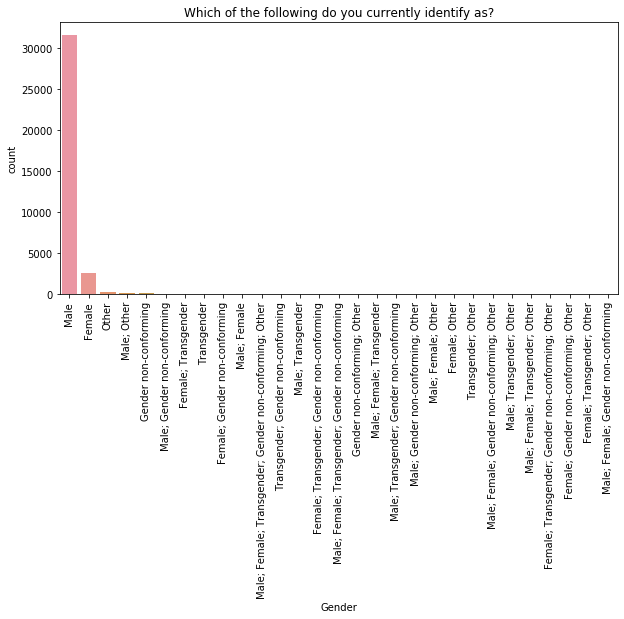

In [57]:
# Gender - Perhaps this is just groups?
col_idx = 'Gender'
plot_col_dist(raw_data, col_idx, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

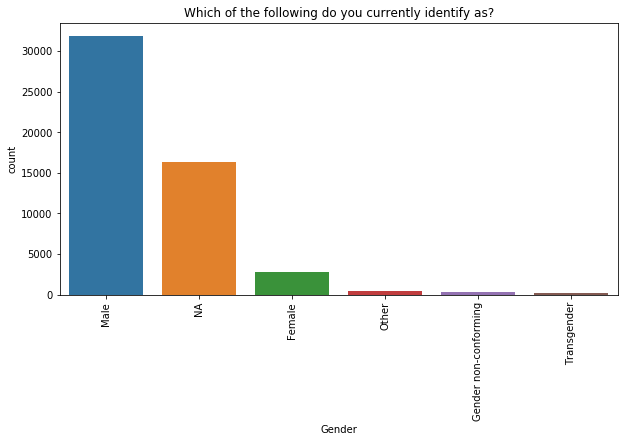

In [58]:
col = 'Gender'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

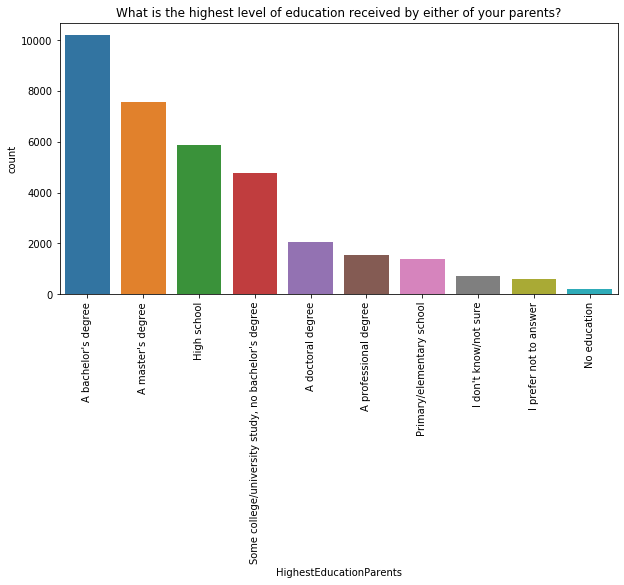

In [59]:
col_order = ['No education', 'Primary/elementary school', 'High school', 'Some college/university study, no bachelor\'s degree',  
             'A professional degree', 'A bachelor\'s degree', 'A master\'s degree', 'A doctoral degree',  'I prefer not to answer', 
             'I don\'t know/not sure', 'NA']

col_idx = 'HighestEducationParents'
plot_col_dist(raw_data, col_idx, order=col_order, title=meta_data.loc[meta_data.Column == col_idx, 'Question'].values[0])

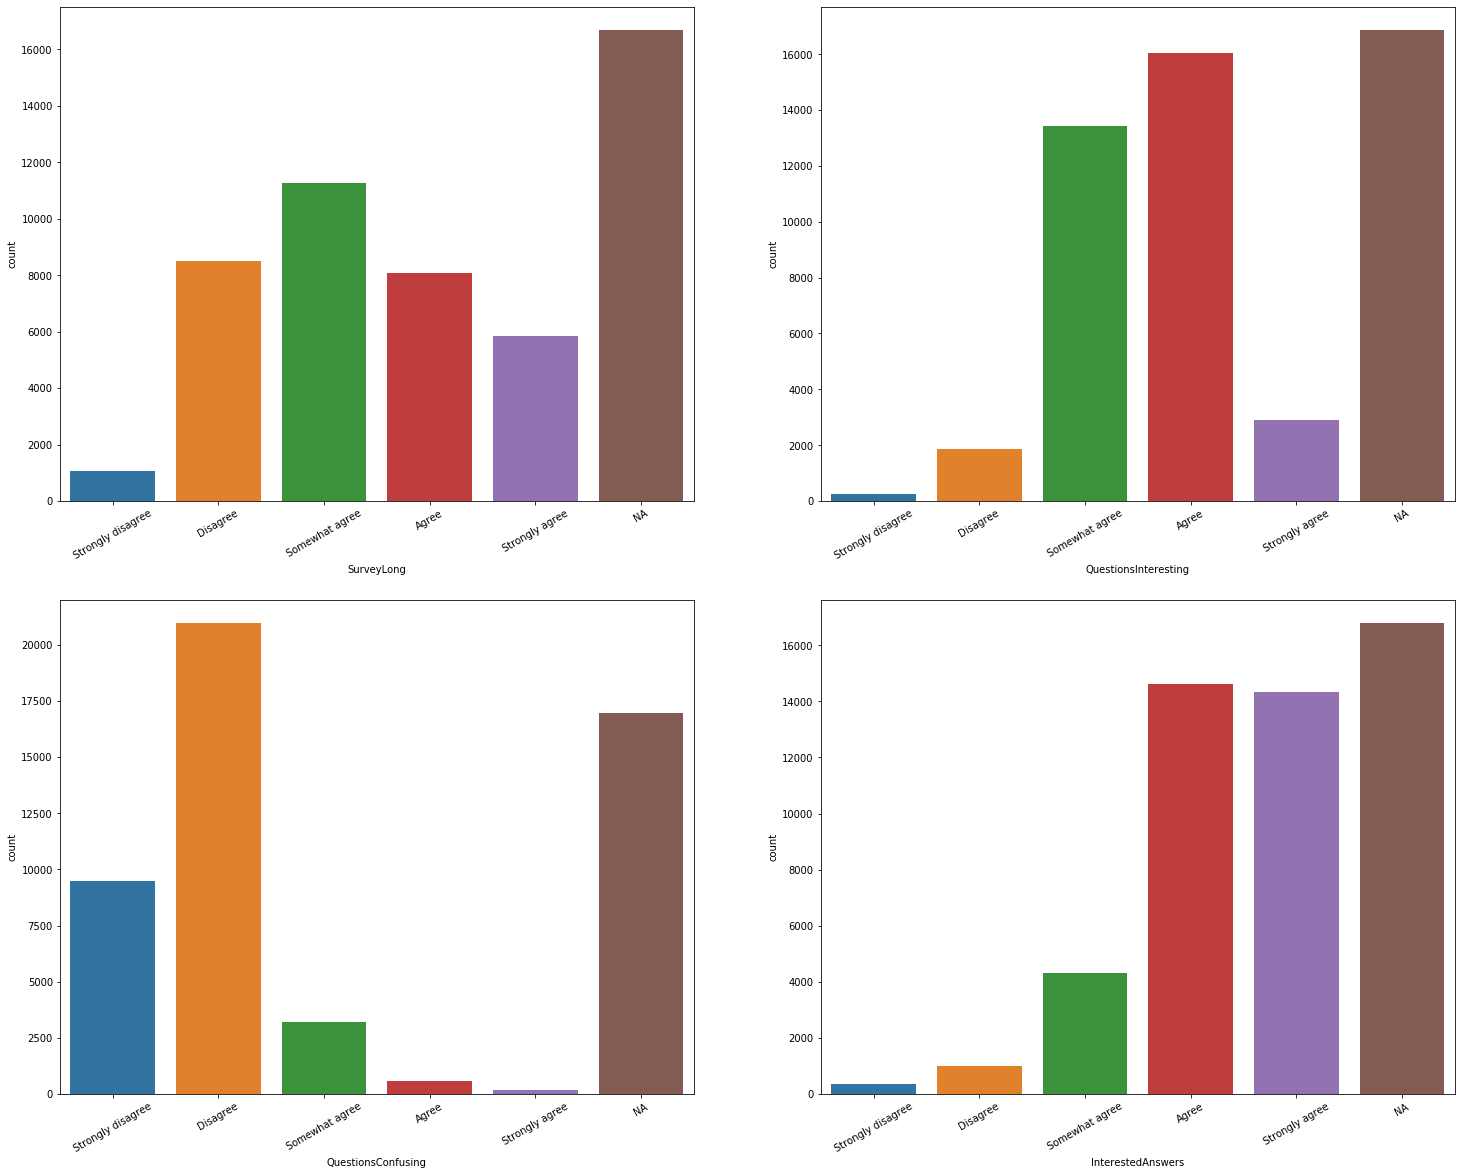

In [60]:
plot_data_dist_grid(raw_data, 
               col_idx = ['SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers'],
               order=['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree', 'NA'],
               n_col=2, n_row=2)

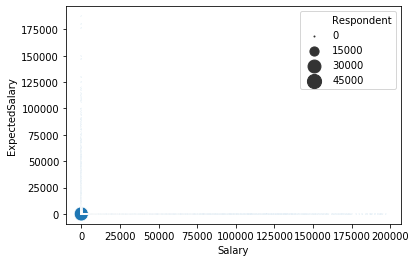

In [61]:
plot_df = raw_data[['Respondent', 'ExpectedSalary', 'Salary']].copy()
plot_df.fillna(value=-1, inplace=True)
plot_df = plot_df.groupby(['ExpectedSalary', 'Salary']).count()
plot_df.reset_index(inplace=True)
sns.scatterplot(data=plot_df, x='Salary', y='ExpectedSalary', size="Respondent", sizes=(1, 200))

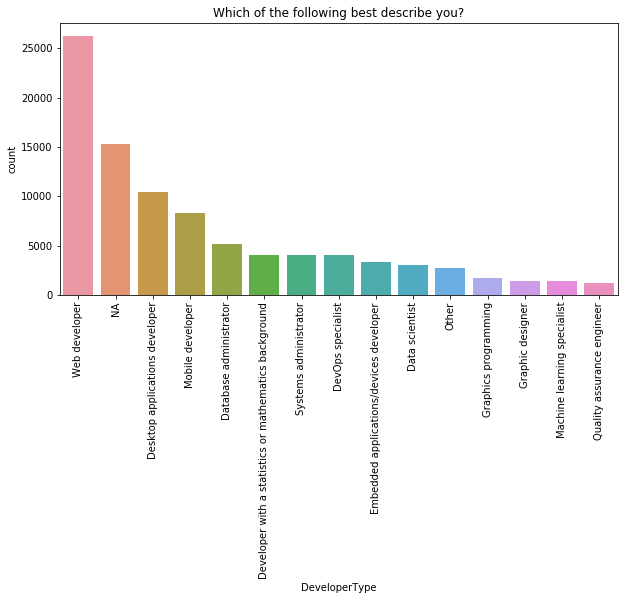

In [62]:
col = 'DeveloperType'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

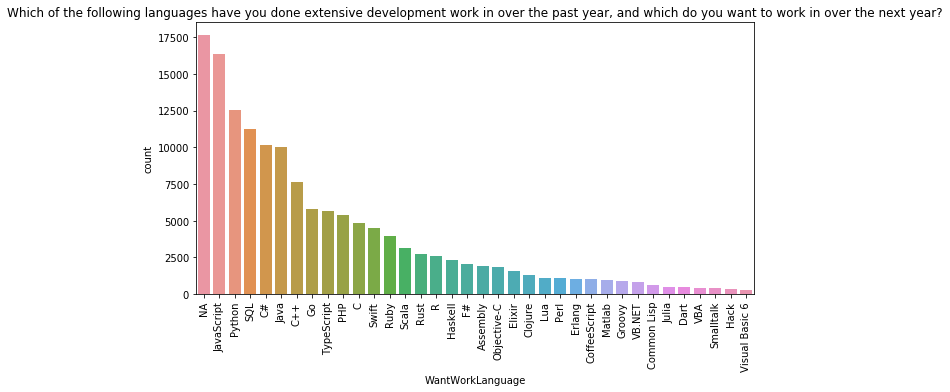

In [63]:
col = 'WantWorkLanguage'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

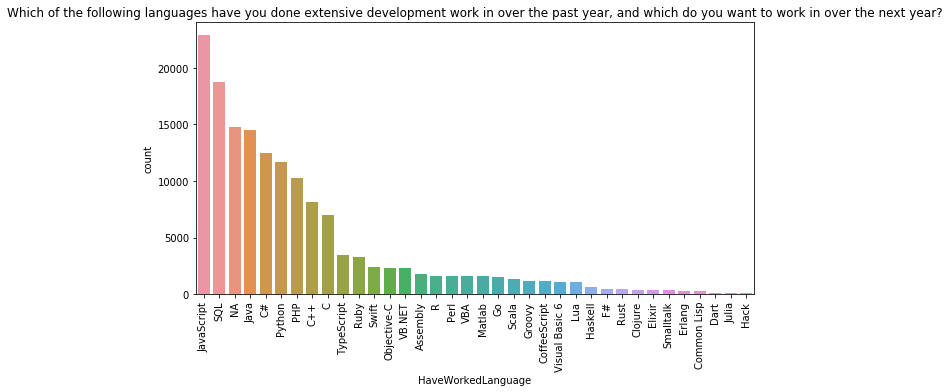

In [64]:
col = 'HaveWorkedLanguage'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

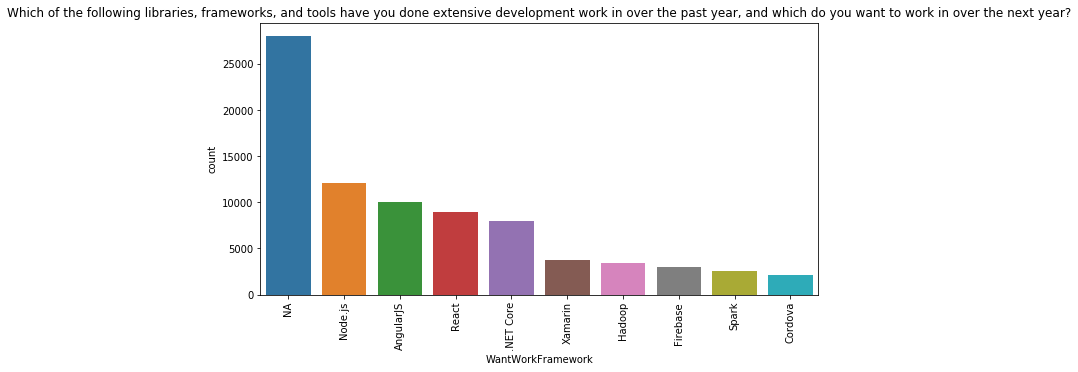

In [65]:
col = 'WantWorkFramework'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

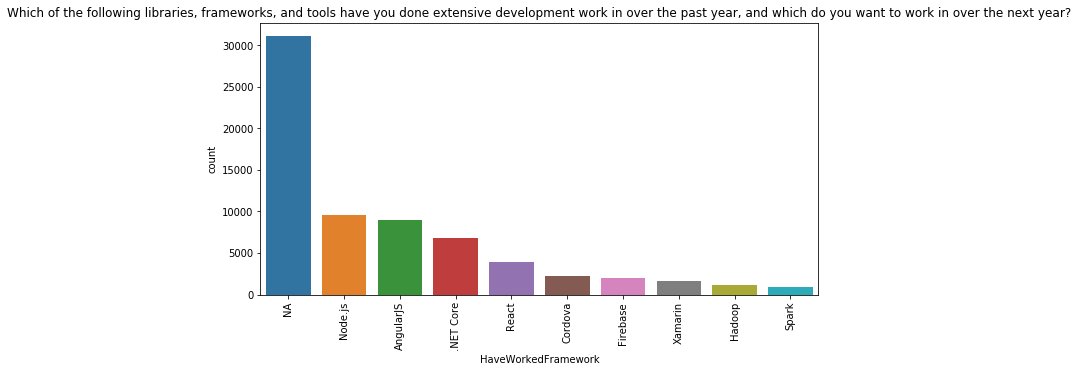

In [66]:
col = 'HaveWorkedFramework'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

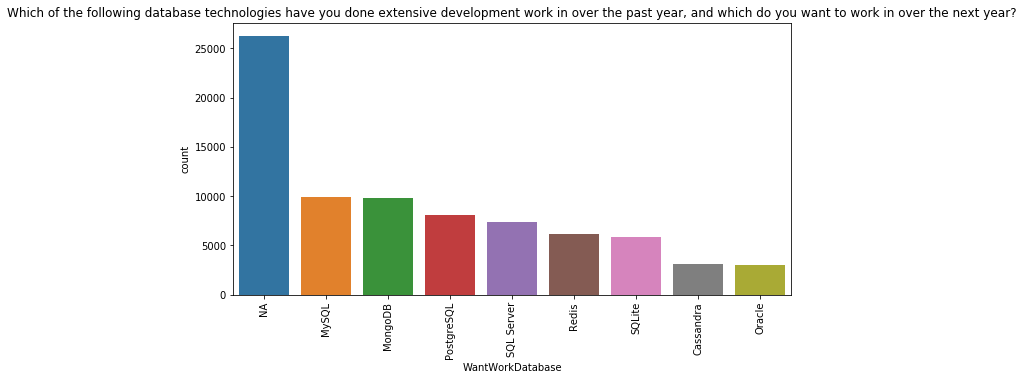

In [67]:
col = 'WantWorkDatabase'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

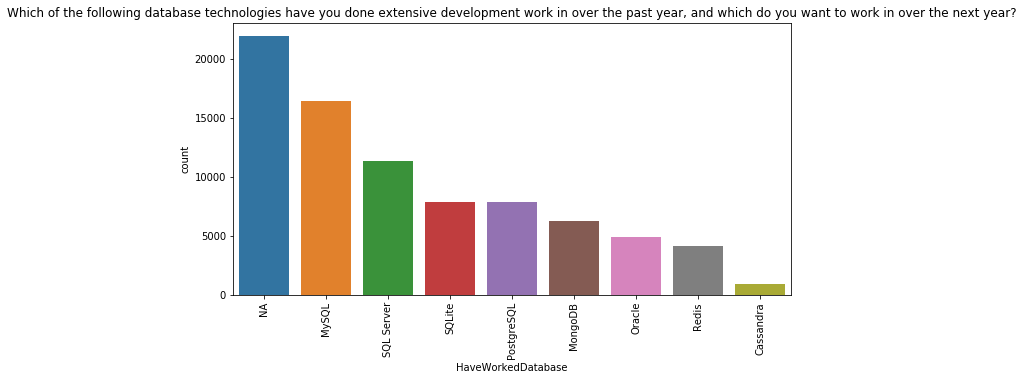

In [68]:
col = 'HaveWorkedDatabase'
encode_df = one_hot_encode(df=raw_data, index_col='Respondent', value_col=col, sep="; ")
plot_df = encode_df.melt(id_vars ='Respondent', var_name=col)
plot_df = plot_df[plot_df['value']]

plot_col_dist(plot_df, col, title=meta_data.loc[meta_data.Column == col, 'Question'].values[0])

### Choropleth Plot

In [69]:
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [70]:
col_idx = 'Respondent'
plot_df = raw_data[[col_idx, 'Country']].groupby(['Country']).agg('count')
plot_df.reset_index(inplace=True)

cty = pd.read_csv(r'.\cty.csv')
plot_df= plot_df.merge(cty, on = ['Country'], how='left')

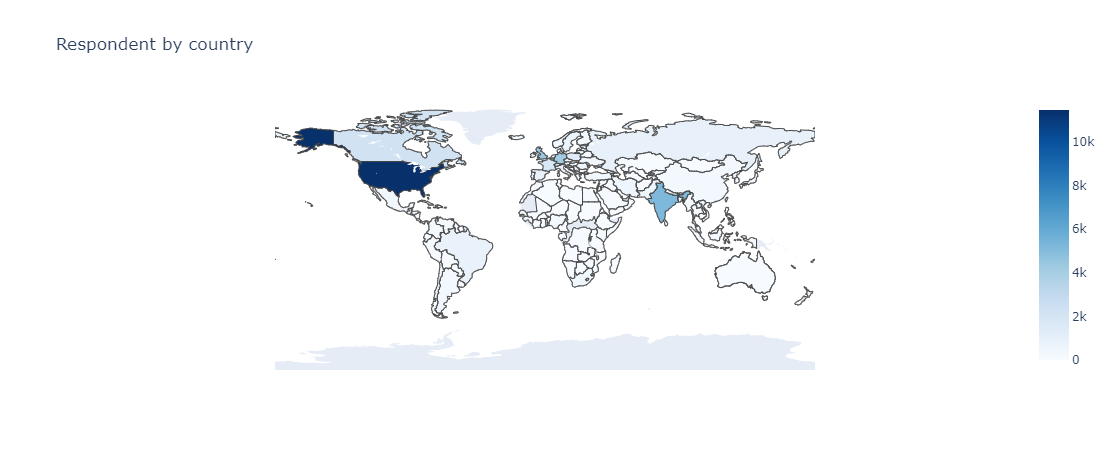

In [71]:
fig = go.Figure(
    data=go.Choropleth(
        locations=plot_df['country_code'], # Spatial coordinates
        z = plot_df[col_idx].astype(float), # Data to be color-coded
        locationmode = 'ISO-3', # set of locations match entries in `locations`
        colorscale = 'Blues',
        reversescale=False,
    )
)

fig.update_layout(
    title_text = '%s by country' % col_idx,
    geo_scope='world',
    geo=dict(
        showframe=False,
        showcoastlines=False
    )
)


fig.show()

# Plot the connectivity of the Programming Languages

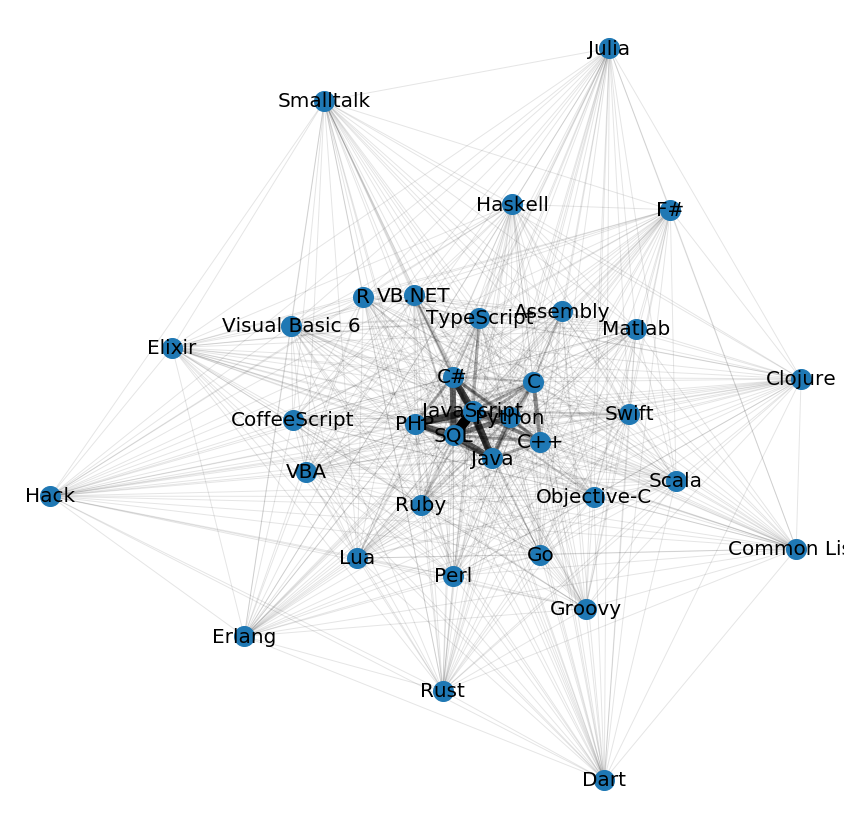

In [72]:
plot_network_graph(raw_data, 'HaveWorkedLanguage')

### TODO: 
1. Explore chord diagram - https://python-graph-gallery.com/231-chord-diagram-with-bokeh/
1. Explore sankey - https://holoviews.org/reference/elements/bokeh/Sankey.html

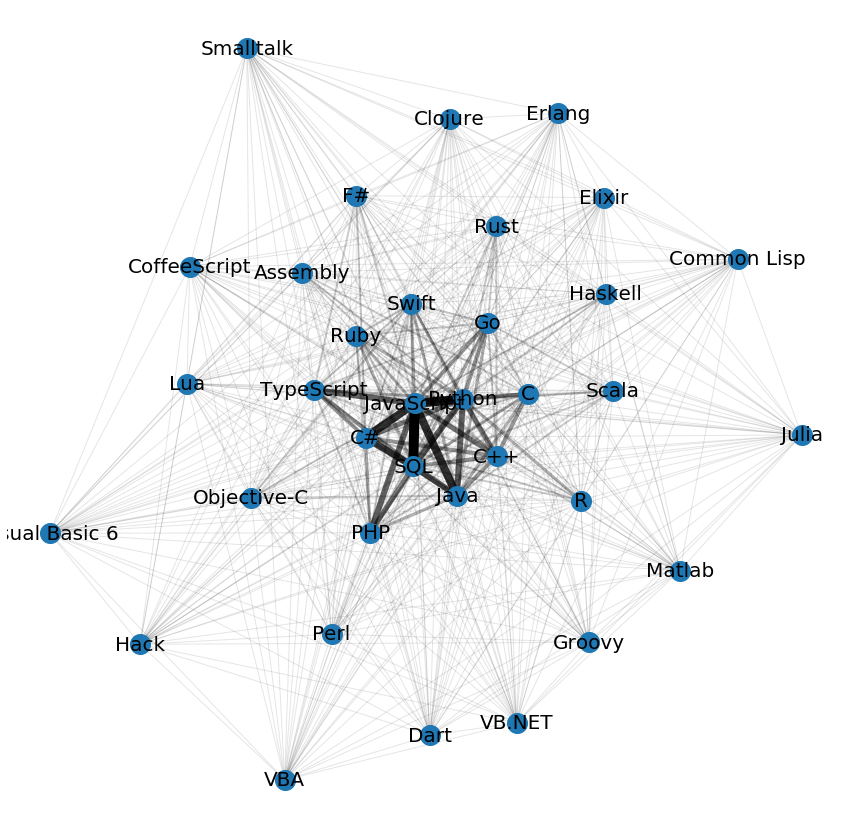

In [78]:
plot_network_graph(raw_data, 'WantWorkLanguage')